### GI data

In [1]:
import os # this allows simple navigation of folders in the notebook
import pandas as pd # this loads Pandas
import numpy as np # This loads NumPy, used to do maths in the notebook
from ebmdatalab import bq # this loads the bennett institute bigquery function
import glob
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib created a temporary cache directory at /tmp/matplotlib-_oz_6aa6 because the default path (/tmp/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# Define function

def bnf_code_filter(df, bnf_code, part_code, excluded_part_code=None):
    # Filter by included prefixes. returns true if it starts with the included prefixes.
    included_bnf_codes = df[bnf_code].str.startswith(tuple(part_code))
    
    # If there are excluded prefixes, filter those out. returns true if containing excluded prefixes, which are then inverted to false.
    if excluded_part_code:
        excluded_bnf_code = ~df[bnf_code].str.startswith(tuple(excluded_part_code))
    else:
        excluded_bnf_code = True  # No exclusion, so all are included.
 
    # Apply both filters. only true if both the included are true.
    filtered_df = df[included_bnf_codes & excluded_bnf_code]
    
    return filtered_df


#### Load datasets

- gi_df: prescribing data, for 0101 and 0103 of the BNF, from 2019-01 to 2024-05
- bnf_df: hierarchical data for legacy bnf codes and names
- practice_df: practice info, including setting code (4=GP practice)
- statistics_df: practice list sizes per month
- ccg_df: CCG/SICBL information

In [3]:
# Load prescribing data from compressed csv chunks
file_pattern = os.path.join("..","data","omep_df_chunk_*.csv.gz") #creates a file path
file_names = glob.glob(file_pattern) # List all files matching the pattern
gi_df = pd.concat([pd.read_csv(file, compression='gzip') for file in file_names], ignore_index=True) # Load each compressed CSV file (decompressing them) into a DataFrame and concatenate them. This is a list comprehension.
bnf_df = pd.read_csv(os.path.join("..","data","bnf_df.csv")) #pd.read_csv is the function that loads it into the DataFrame
practices_df = pd.read_csv(os.path.join("..","data","practices_df.csv"))
statistics_df = pd.read_csv(os.path.join("..","data","statistics_df.csv"))
ccg_df = pd.read_csv(os.path.join("..","data","ccg_df.csv"))

In [7]:
gi_df.head()

,month,pct,practice,bnf_name,bnf_code,items,quantity,net_cost,actual_cost
0,2022-02-01,70F,H82034,Urea [13-C] 50mg tablets breath test kit,010300000AAADAD,6,6.0,127.50,119.43981
1,2022-02-01,92A,H81128,Losec MUPS 10mg gastro-resistant tablets,0103050P0BBADAM,6,196.0,65.10,61.02098
2,2022-02-01,D9Y0V,J82074,Magnesium hydroxide 7.45-8.35% oral suspension BP,0101010Q0AAAGAG,6,4000.0,64.40,60.36564
3,2022-02-01,27D,N81067,Emozul 20mg gastro-resistant capsules,0103050E0BCAAAF,7,168.0,31.82,30.27666
4,2022-02-01,14L,P84074,Maalox Plus oral suspension,0101010L0BEAAAI,8,4000.0,46.56,43.68864


In [8]:
practices_df.head()

,code,name,address1,address2,address3,address4,address5,postcode,location,ccg_id,pcn_id,setting,close_date,join_provider_date,leave_provider_date,open_date,status_code
0,01Y999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN
1,09X999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN
2,NHT999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN
3,04R999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN
4,04E999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN


In [9]:
ccg_df.head()

,code,name,ons_code,org_type,open_date,close_date,address,postcode,stp_id,regional_team_id
0,RYG,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
1,RYY,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
2,RYW,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
3,NYF,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
4,NCN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
bnf_df.head()

,chapter,chapter_code,section,section_code,para,para_code,subpara,subpara_code,chemical,chemical_code,product,product_code,presentation,presentation_code
0,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Other antacid and simeticone preparations,010101000,Proprietary compound preparation BNF 0101010,010101000BB,Indigestion mixture,010101000BBAJA0
1,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Alexitol sodium,0101010A0,Alexitol sodium,0101010A0AA,Alexitol sodium 360mg tablets,0101010A0AAAAAA
2,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Alexitol sodium,0101010A0,Actal,0101010A0BB,Actal 360mg tablets,0101010A0BBAAAA
3,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Aluminium hydroxide,0101010C0,Aluminium hydroxide,0101010C0AA,Aluminium hydroxide 475mg capsules,0101010C0AAAAAA
4,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Aluminium hydroxide,0101010C0,Aluminium hydroxide,0101010C0AA,Aluminium hydroxide oral suspension sugar free,0101010C0AAACAC


#### Define high-level categories and gather monthly data

In [4]:
##Define high-level categories

#Alternative H2RAs
alternative_H2RA = ['0103010H0', '0103010N0', '0103010D0']
alternative_H2RA_exclude_codes = ['0103010D0AAAEAE', '0103010D0BBAEAE', '0103010N0BBACAC', '0103010N0AAACAC']

#PPIs
PPI_code = ['0103050E0', '0103050L0', '0103050P0', '0103050R0', '0103050T0']
PPI_exclude_codes = ['0103050E0AAACAC', '0103050E0BBACAC', '0103050P0BBAHBG', '0103050P0BBAGAV', '0103050P0AABGBG', '0103050P0AAAVAV', '0103050R0AAACAC', '0103050R0BBACAC']

#Antacids
antacids_code = ['010101', '0101021C0AA', '010102100BBAXA0', '0101021C0BNAAAF', '0101021C0BJABAF', '0101021C0BJAAAF', '0101021C0BBAAAF']
antacids_exclude_codes = ['0101010F0AABABA', '0101010F0AABCBC', '0101010F0AABBBB', '0101010F0AAAXAX', '0101010F0AAAVAV', '0101010F0AAAZAZ', '0101010F0AAAYAY', '0101010F0AAAWAW', '0101010F0AABDBD', '0101010J0AAAIAI', '0101010J0AAAJAJ', '0101010J0AAAKAK', '010101000BB', '010101000BBAJA0', '010101200AA', '010101200AAABAB', '010101200AAACAC']

In [5]:
##Filter data by category
data_filtered_alternative_H2RA = bnf_code_filter(gi_df, 'bnf_code', alternative_H2RA, alternative_H2RA_exclude_codes)

data_filtered_PPI = bnf_code_filter(gi_df, 'bnf_code', PPI_code, PPI_exclude_codes)

data_filtered_antacids = bnf_code_filter(gi_df, 'bnf_code', antacids_code, antacids_exclude_codes)

In [6]:
##Group items for each category by month
H2RA_monthly_totals = data_filtered_alternative_H2RA.groupby('month')['items'].sum().reset_index()

PPI_monthly_totals = data_filtered_PPI.groupby('month')['items'].sum().reset_index()

antacids_monthly_totals = data_filtered_antacids.groupby('month')['items'].sum().reset_index()

In [7]:
##Group spend for each category by month
PPI_monthly_cost = data_filtered_PPI.groupby('month')['actual_cost'].sum().reset_index()
alternative_H2RA_monthly_cost = data_filtered_alternative_H2RA.groupby('month')['actual_cost'].sum().reset_index()
antacids_monthly_cost = data_filtered_antacids.groupby('month')['actual_cost'].sum().reset_index()

#### Define chemical-level categories and gather monthly data

In [8]:
##Define chemical codes

#Ranitidine
ranitidine_code = ['0103010T0']
ranitidine_exclude_codes = ['0103010T0AAADAD', '0103010T0BBADAD']

#Alternative H2RAs
cimetidine_codes = ['0103010D0']
cimetidine_exclude_codes = ['0103010D0AAAEAE', '0103010D0BBAEAE']

famotidine_codes = ['0103010H0']

nizatidine_codes = ['0103010N0']
nizatidine_exclude_codes = ['0103010N0BBACAC', '0103010N0AAACAC']

#PPIs
esomeprazole_codes = ['0103050E0']
esomeprazole_exclude_codes = ['0103050E0AAACAC', '0103050E0BBACAC']

lansoprazole_codes = ['0103050L0']

omeprazole_codes = ['0103050P0']
omeprazole_exclude_codes = ['0103050P0BBAHBG', '0103050P0BBAGAV', '0103050P0AABGBG', '0103050P0AAAVAV']

pantoprazole_codes = ['0103050R0']
pantoprazole_exclude_codes = ['0103050R0AAACAC', '0103050R0BBACAC']

rabeprazole_codes = ['0103050T0']

In [9]:
##Filter data by chemical

#Ranitidine
data_filtered_ranitidine = bnf_code_filter(gi_df, 'bnf_code', ranitidine_code, ranitidine_exclude_codes)

#Alternative H2RAs
data_filtered_cimetidine = bnf_code_filter(gi_df, 'bnf_code', cimetidine_codes, cimetidine_exclude_codes)
data_filtered_famotidine = bnf_code_filter(gi_df, 'bnf_code', famotidine_codes)
data_filtered_nizatidine = bnf_code_filter(gi_df, 'bnf_code', nizatidine_codes, nizatidine_exclude_codes)

#PPIs
data_filtered_esomeprazole = bnf_code_filter(gi_df, 'bnf_code', esomeprazole_codes, esomeprazole_exclude_codes)
data_filtered_lansoprazole = bnf_code_filter(gi_df, 'bnf_code', lansoprazole_codes)
data_filtered_omeprazole = bnf_code_filter(gi_df, 'bnf_code', omeprazole_codes, omeprazole_exclude_codes)
data_filtered_pantoprazole = bnf_code_filter(gi_df, 'bnf_code', pantoprazole_codes, pantoprazole_exclude_codes)
data_filtered_rabeprazole = bnf_code_filter(gi_df, 'bnf_code', rabeprazole_codes)

In [10]:
##Group items for each chemical by month

#Ranitidine
ranitidine_monthly_totals = data_filtered_ranitidine.groupby('month')['items'].sum().reset_index()

#Alternative H2RAs
cimetidine_monthly_totals = data_filtered_cimetidine.groupby('month')['items'].sum().reset_index()
famotidine_monthly_totals = data_filtered_famotidine.groupby('month')['items'].sum().reset_index()
nizatidine_monthly_totals = data_filtered_nizatidine.groupby('month')['items'].sum().reset_index()

#PPIs
esomeprazole_monthly_totals = data_filtered_esomeprazole.groupby('month')['items'].sum().reset_index()
lansoprazole_monthly_totals = data_filtered_lansoprazole.groupby('month')['items'].sum().reset_index()
omeprazole_monthly_totals = data_filtered_omeprazole.groupby('month')['items'].sum().reset_index()
pantoprazole_monthly_totals = data_filtered_pantoprazole.groupby('month')['items'].sum().reset_index()
rabeprazole_monthly_totals = data_filtered_rabeprazole.groupby('month')['items'].sum().reset_index()

In [11]:
##Group spend for each chemical by month

#Ranitidine
ranitidine_monthly_cost = data_filtered_ranitidine.groupby('month')['actual_cost'].sum().reset_index()

#Alternative H2RAs
cimetidine_monthly_cost = data_filtered_cimetidine.groupby('month')['actual_cost'].sum().reset_index()
famotidine_monthly_cost = data_filtered_famotidine.groupby('month')['actual_cost'].sum().reset_index()
nizatidine_monthly_cost = data_filtered_nizatidine.groupby('month')['actual_cost'].sum().reset_index()

#PPIs
lansoprazole_monthly_cost = data_filtered_lansoprazole.groupby('month')['actual_cost'].sum().reset_index()
omeprazole_monthly_cost = data_filtered_omeprazole.groupby('month')['actual_cost'].sum().reset_index()
esomeprazole_monthly_cost = data_filtered_esomeprazole.groupby('month')['actual_cost'].sum().reset_index()
pantoprazole_monthly_cost = data_filtered_pantoprazole.groupby('month')['actual_cost'].sum().reset_index()
rabeprazole_monthly_cost = data_filtered_rabeprazole.groupby('month')['actual_cost'].sum().reset_index()

#### Generate Item Graphs

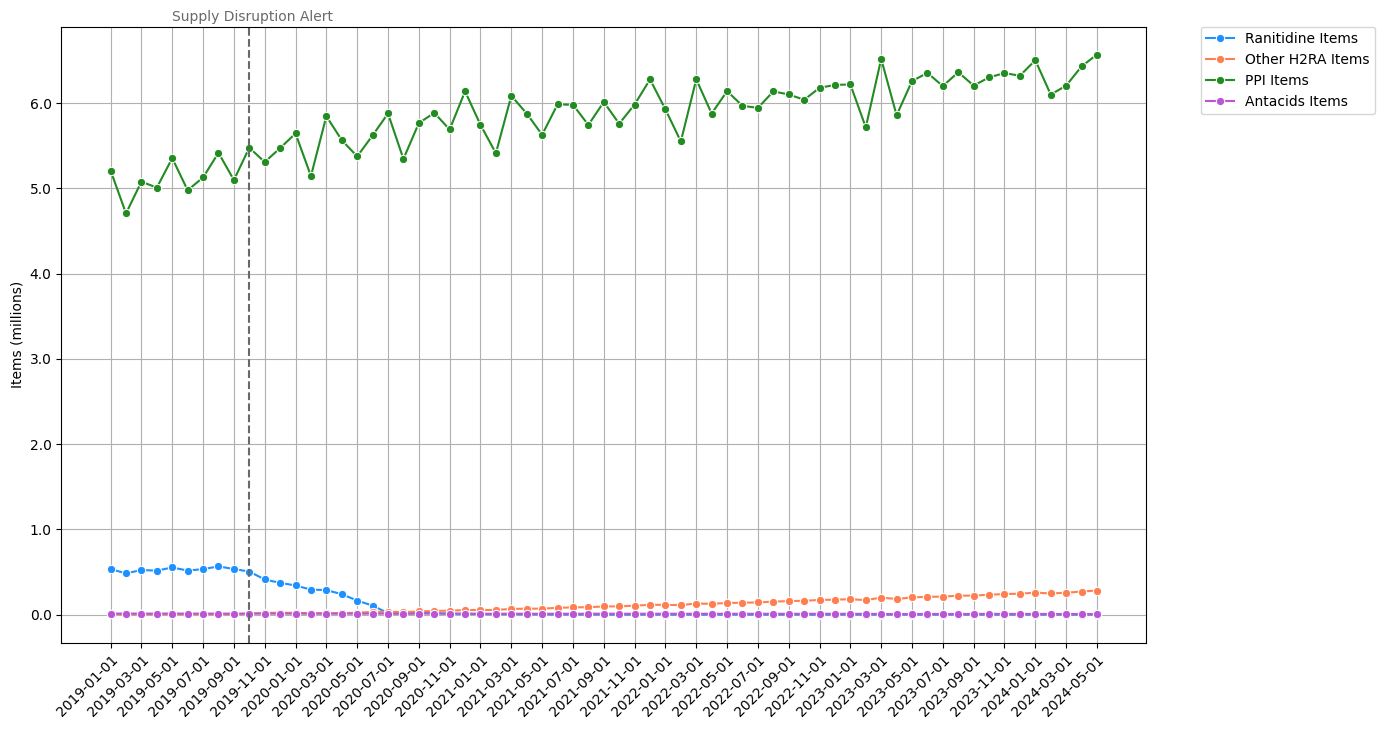

In [32]:
# Create a Seaborn figure for all 3 classes + ranitidine
plt.figure(figsize=(14, 8))  # Increase figure size for better readability

# Plot the original monthly totals for Ranitidine using Seaborn
sns.lineplot(data=ranitidine_monthly_totals, x='month', y='items', marker='o', label='Ranitidine Items', color='dodgerblue')
 
# Plot the aggregated totals for the Alternative H2RA chemicals
sns.lineplot(data=H2RA_monthly_totals, x='month', y='items', marker='o', label='Other H2RA Items', color='coral')

#Plot monthly totals for PPIs
sns.lineplot(data=PPI_monthly_totals, x='month', y='items', marker='o', label='PPI Items', color='forestgreen')

#Plot monthly totals for antacids 
sns.lineplot(data=antacids_monthly_totals, x='month', y='items', marker='o', label='Antacids Items', color='mediumorchid')

# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=ranitidine_monthly_totals['month'][::2], rotation=45, rotation_mode='anchor', horizontalalignment='right')
 
# Add titles and labels
plt.ylabel('Items (millions)')
plt.xlabel(None)
 
# Add a legend to differentiate the lines
plt.legend()

#add vertical line for date of shortage and annotate it.
plt.axvline(x = '2019-10-01', ymin = 0, ymax = 1, color='dimgrey', linestyle='--')

plt.annotate('Supply Disruption Alert', color='dimgrey',
             xy=('2019-10-01', max(PPI_monthly_totals['items'])),
             xytext=('2019-05-01', max(PPI_monthly_totals['items']) * 1.06))

# Adding grid for better readability
plt.grid(True)

#Move legend box outside 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Format y-axis labels
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.1f}".format(x / 1000000)))

# Display the plot
plt.show()

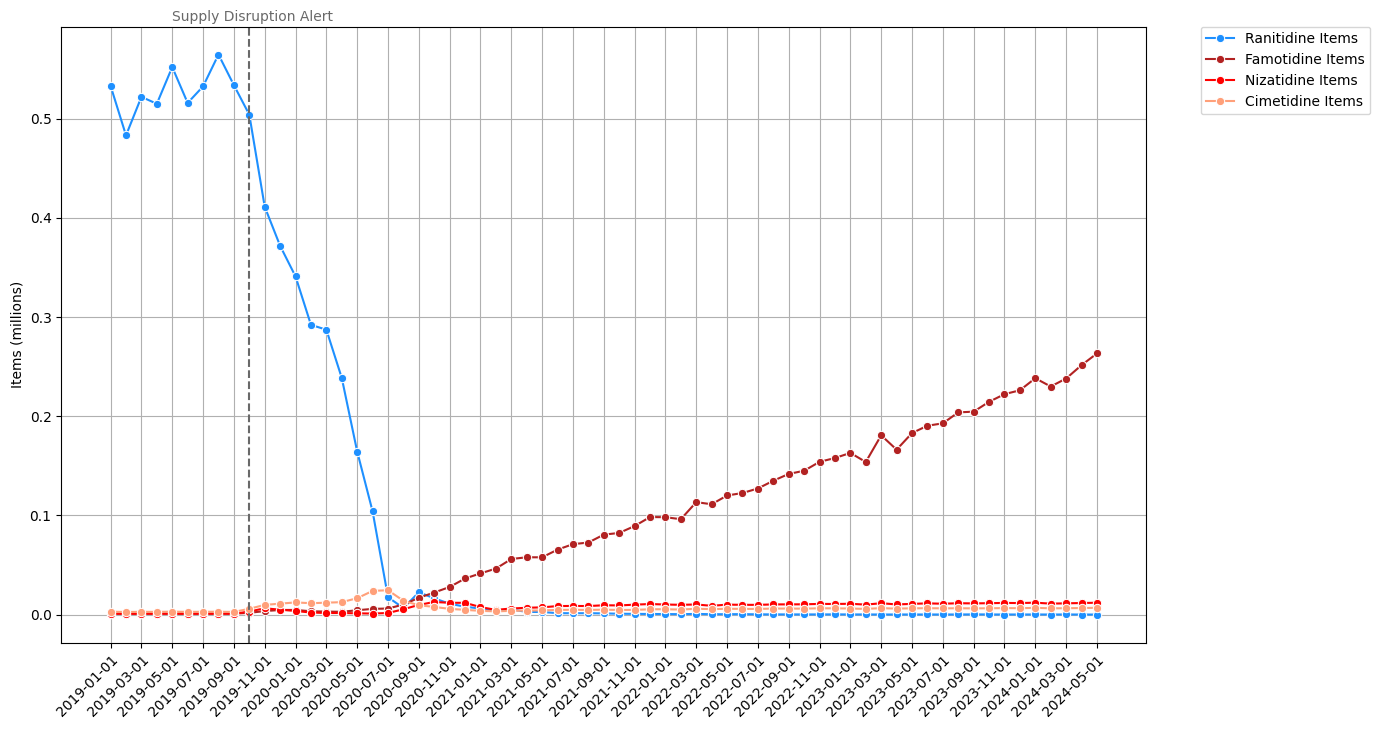

In [33]:
# Create a Seaborn figure for specific H2RA antagonists
plt.figure(figsize=(14, 8))  # Increase figure size for better readability
 
# Plot the original monthly totals for H2RA antagonists using Seaborn
sns.lineplot(data=ranitidine_monthly_totals, x='month', y='items', marker='o', label='Ranitidine Items', color='dodgerblue')

sns.lineplot(data=famotidine_monthly_totals, x='month', y='items', marker='o', label='Famotidine Items', color='firebrick')

sns.lineplot(data=nizatidine_monthly_totals, x='month', y='items', marker='o', label='Nizatidine Items', color='red')

sns.lineplot(data=cimetidine_monthly_totals, x='month', y='items', marker='o', label='Cimetidine Items', color='lightsalmon')
 
 
# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)
 
# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=ranitidine_monthly_totals['month'][::2], rotation=45, rotation_mode='anchor', horizontalalignment='right')
 
# Add titles and labels
plt.xlabel(None)
plt.ylabel('Items (millions)')
 
# Add a legend to differentiate the lines
plt.legend()

#add vertical line for date of shortage and annotate it.
plt.axvline(x = '2019-10-01', ymin = 0, ymax = 1, color='dimgrey', linestyle='--')

plt.annotate('Supply Disruption Alert', color='dimgrey',
             xy=('2019-10-01', max(ranitidine_monthly_totals['items'])),
             xytext=('2019-05-01', max(ranitidine_monthly_totals['items']) * 1.06))
 
# Adding grid for better readability
plt.grid(True)

#Move legend box outside 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Format y-axis labels
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.1f}".format(x / 1000000)))
 
# Display the plot
plt.show()

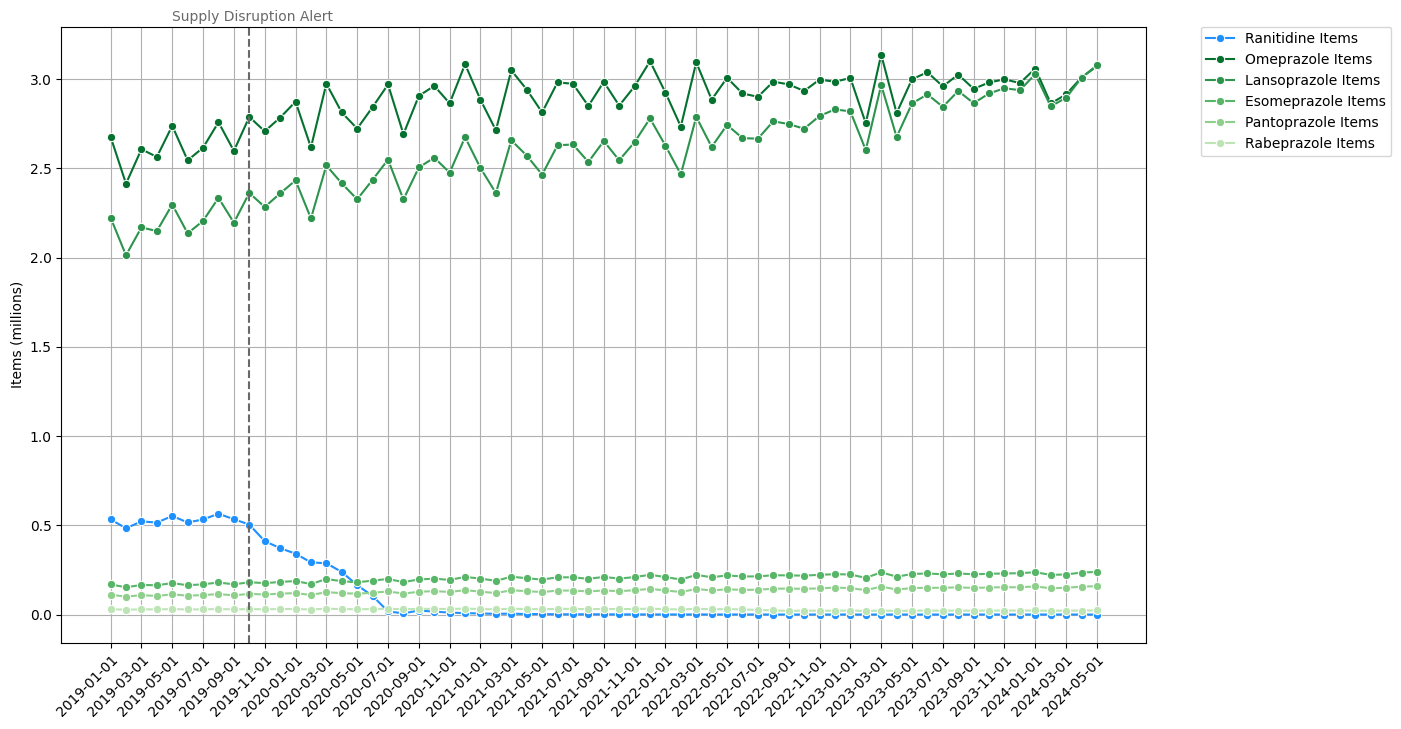

In [34]:
#Create a Seaborn Figure for Specific PPIs
plt.figure(figsize=(14, 8))  # Increase figure size for better readability
sns.set_palette('Greens_r', 6)

# Plot the original monthly totals for PPIs using Seaborn
sns.lineplot(data=ranitidine_monthly_totals, x='month', y='items', marker='o', label='Ranitidine Items', color='dodgerblue')

sns.lineplot(data=omeprazole_monthly_totals, x='month', y='items', marker='o', label='Omeprazole Items')

sns.lineplot(data=lansoprazole_monthly_totals, x='month', y='items', marker='o', label='Lansoprazole Items')

sns.lineplot(data=esomeprazole_monthly_totals, x='month', y='items', marker='o', label='Esomeprazole Items')
 
sns.lineplot(data=pantoprazole_monthly_totals, x='month', y='items', marker='o', label='Pantoprazole Items')

sns.lineplot(data=rabeprazole_monthly_totals, x='month', y='items', marker='o', label='Rabeprazole Items')
 
# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=ranitidine_monthly_totals['month'][::2], rotation=45, rotation_mode='anchor', horizontalalignment='right')
 
# Add titles and labels
plt.xlabel(None)
plt.ylabel('Items (millions)')
 
# Add a legend to differentiate the lines
plt.legend()

#add vertical line for date of shortage and annotate it.
plt.axvline(x = '2019-10-01', ymin = 0, ymax = 1, color='dimgrey', linestyle='--')

plt.annotate('Supply Disruption Alert', color='dimgrey',
             xy=('2019-10-01', max(ranitidine_monthly_totals['items'])),
             xytext=('2019-05-01', max(omeprazole_monthly_totals['items']) * 1.06))
 
# Adding grid for better readability
plt.grid(True)

#Move legend box outside 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Format y-axis labels
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.1f}".format(x / 1000000)))
 
# Display the plot
plt.show()

#### Generate Spend Graph

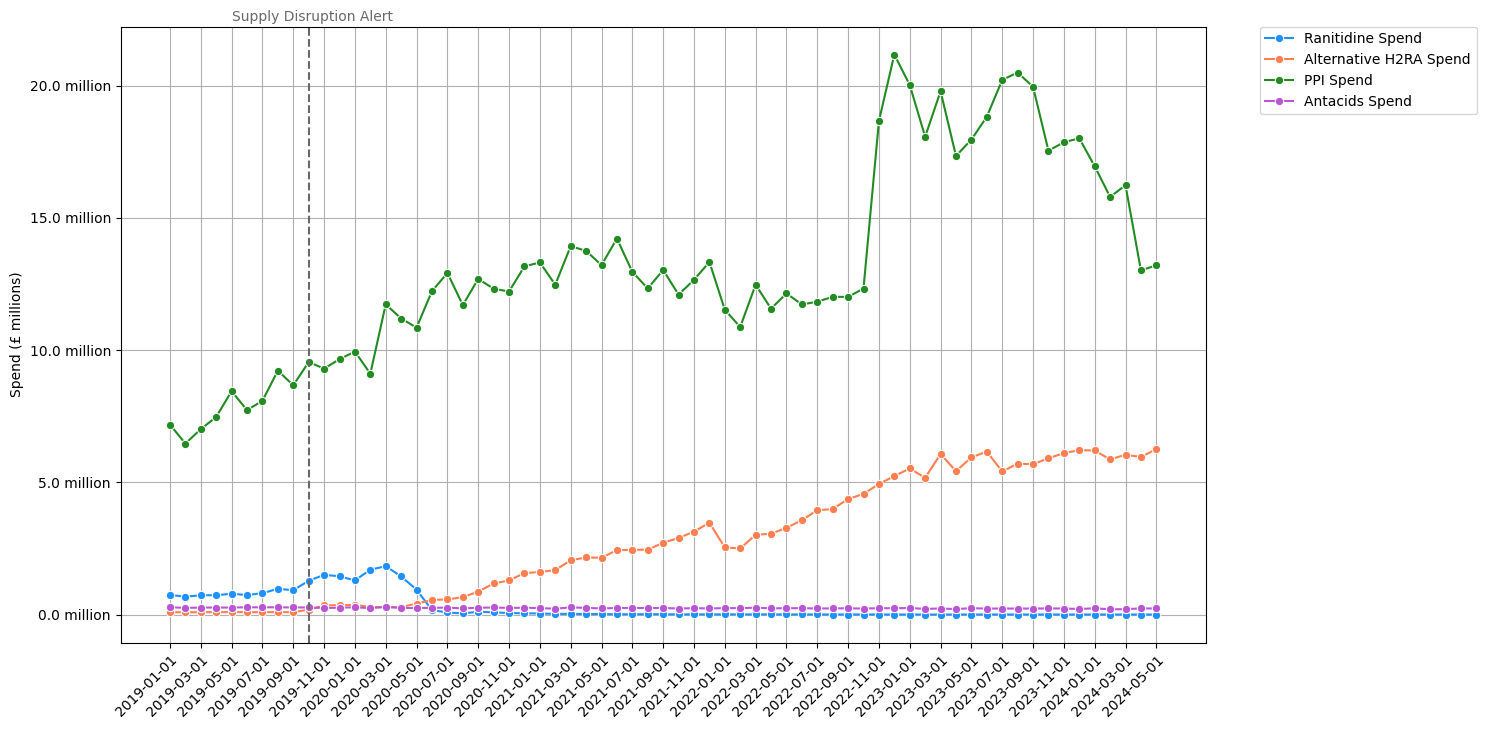

In [12]:
#Create Seaborn Figure for Monthly Costs
plt.figure(figsize=(14, 8))  # Increase figure size for better readability
 
# Plot the original monthly totals for H2RA antagonists using Seaborn
sns.lineplot(data=ranitidine_monthly_cost, x='month', y='actual_cost', marker='o', label='Ranitidine Spend', color='dodgerblue')
 
sns.lineplot(data=alternative_H2RA_monthly_cost, x='month', y='actual_cost', marker='o', label='Alternative H2RA Spend',color='coral')

sns.lineplot(data=PPI_monthly_cost, x='month', y='actual_cost', marker='o', label='PPI Spend', color='forestgreen')

sns.lineplot(data=antacids_monthly_cost, x='month', y='actual_cost', marker='o', label='Antacids Spend', color='mediumorchid')
 
 
# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=ranitidine_monthly_totals['month'][::2], rotation=45, rotation_mode='anchor', horizontalalignment='right')
 
# Add titles and labels
plt.xlabel(None)
plt.ylabel('Spend (£ millions)')

#add vertical line for date of shortage and annotate it.
plt.axvline(x = '2019-10-01', ymin = 0, ymax = 1, color='dimgrey', linestyle='--')

plt.annotate('Supply Disruption Alert', color='dimgrey',
             xy=('2019-10-01', max(PPI_monthly_cost['actual_cost'])),
             xytext=('2019-05-01', max(PPI_monthly_cost['actual_cost']) * 1.06))
 
 
# Add a legend to differentiate the lines
plt.legend()
 
# Adding grid for better readability
plt.grid(True)

#Move legend box outside 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Format y-axis labels
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.1f} million".format(x / 1000000)))
 
# Display the plot
plt.show()


#### Retrieve Data for Table of Values

In [13]:
# Items Values for July 2019 and 2020 by class and by individual drug 

#Drug Classes
print(PPI_monthly_totals[PPI_monthly_totals['month']=='2019-07-01'])
print(PPI_monthly_totals[PPI_monthly_totals['month']=='2020-07-01'])
print(H2RA_monthly_totals[H2RA_monthly_totals['month']=='2019-07-01'])
print(H2RA_monthly_totals[H2RA_monthly_totals['month']=='2020-07-01'])
print(antacids_monthly_totals[antacids_monthly_totals['month']=='2019-07-01'])
print(antacids_monthly_totals[antacids_monthly_totals['month']=='2020-07-01'])

#ranitidine
print(ranitidine_monthly_totals[ranitidine_monthly_totals['month']=='2019-07-01'])
print(ranitidine_monthly_totals[ranitidine_monthly_totals['month']=='2020-07-01'])


#PPIs
print(lansoprazole_monthly_totals[lansoprazole_monthly_totals['month']=='2019-07-01'])
print(lansoprazole_monthly_totals[lansoprazole_monthly_totals['month']=='2020-07-01'])
print(omeprazole_monthly_totals[omeprazole_monthly_totals['month']=='2019-07-01'])
print(omeprazole_monthly_totals[omeprazole_monthly_totals['month']=='2020-07-01'])
print(esomeprazole_monthly_totals[esomeprazole_monthly_totals['month']=='2019-07-01'])
print(esomeprazole_monthly_totals[esomeprazole_monthly_totals['month']=='2020-07-01'])
print(pantoprazole_monthly_totals[pantoprazole_monthly_totals['month']=='2019-07-01'])
print(pantoprazole_monthly_totals[pantoprazole_monthly_totals['month']=='2020-07-01'])
print(rabeprazole_monthly_totals[rabeprazole_monthly_totals['month']=='2019-07-01'])
print(rabeprazole_monthly_totals[rabeprazole_monthly_totals['month']=='2020-07-01'])

#alternative H2RAs
print(cimetidine_monthly_totals[cimetidine_monthly_totals['month']=='2019-07-01'])
print(cimetidine_monthly_totals[cimetidine_monthly_totals['month']=='2020-07-01'])
print(famotidine_monthly_totals[famotidine_monthly_totals['month']=='2019-07-01'])
print(famotidine_monthly_totals[famotidine_monthly_totals['month']=='2020-07-01'])
print(nizatidine_monthly_totals[nizatidine_monthly_totals['month']=='2019-07-01'])
print(nizatidine_monthly_totals[nizatidine_monthly_totals['month']=='2020-07-01'])

        month    items
6  2019-07-01  5127828
         month    items
18  2020-07-01  5878755
        month  items
6  2019-07-01   4474
         month  items
18  2020-07-01  32200
        month    items
6  2019-07-01  2205234
         month    items
18  2020-07-01  2548575
        month    items
6  2019-07-01  2615359
         month    items
18  2020-07-01  2969453
        month   items
6  2019-07-01  169209
         month   items
18  2020-07-01  199202
        month   items
6  2019-07-01  108859
         month   items
18  2020-07-01  129182
        month  items
6  2019-07-01  29167
         month  items
18  2020-07-01  32343
        month  items
6  2019-07-01   2784
         month  items
18  2020-07-01  24545
        month  items
6  2019-07-01    842
         month  items
18  2020-07-01   6100
        month  items
6  2019-07-01    848
         month  items
18  2020-07-01   1555


In [14]:
# Prescribing spend totals for July 2019 and July 2020 by class and by individual drug

# By drug class
print(PPI_monthly_cost[PPI_monthly_cost['month']=='2019-07-01'])
print(PPI_monthly_cost[PPI_monthly_cost['month']=='2020-07-01'])
print(alternative_H2RA_monthly_cost[alternative_H2RA_monthly_cost['month']=='2019-07-01'])
print(alternative_H2RA_monthly_cost[alternative_H2RA_monthly_cost['month']=='2020-07-01'])
print(antacids_monthly_totals[antacids_monthly_totals['month']=='2019-07-01'])
print(antacids_monthly_totals[antacids_monthly_totals['month']=='2020-07-01'])
print(antacids_monthly_cost[antacids_monthly_cost['month']=='2020-07-01'])
print(antacids_monthly_cost[antacids_monthly_cost['month']=='2019-07-01'])

# PPIs
print(lansoprazole_monthly_cost[lansoprazole_monthly_cost['month']=='2019-07-01'])
print(lansoprazole_monthly_cost[lansoprazole_monthly_cost['month']=='2020-07-01'])
print(omeprazole_monthly_cost[omeprazole_monthly_cost['month']=='2019-07-01'])
print(omeprazole_monthly_cost[omeprazole_monthly_cost['month']=='2020-07-01'])
print(esomeprazole_monthly_cost[esomeprazole_monthly_cost['month']=='2019-07-01'])
print(esomeprazole_monthly_cost[esomeprazole_monthly_cost['month']=='2020-07-01'])
print(pantoprazole_monthly_cost[pantoprazole_monthly_cost['month']=='2019-07-01'])
print(pantoprazole_monthly_cost[pantoprazole_monthly_cost['month']=='2020-07-01'])
print(rabeprazole_monthly_cost[rabeprazole_monthly_cost['month']=='2019-07-01'])
print(rabeprazole_monthly_cost[rabeprazole_monthly_cost['month']=='2020-07-01'])


# H2RAs 
print(cimetidine_monthly_cost[cimetidine_monthly_cost['month']=='2019-07-01'])
print(cimetidine_monthly_cost[cimetidine_monthly_cost['month']=='2020-07-01'])
print(famotidine_monthly_cost[famotidine_monthly_cost['month']=='2019-07-01'])
print(famotidine_monthly_cost[famotidine_monthly_cost['month']=='2020-07-01'])
print(nizatidine_monthly_cost[nizatidine_monthly_cost['month']=='2019-07-01'])
print(nizatidine_monthly_cost[nizatidine_monthly_cost['month']=='2020-07-01'])

        month   actual_cost
6  2019-07-01  8.084335e+06
         month   actual_cost
18  2020-07-01  1.291721e+07
        month  actual_cost
6  2019-07-01  89359.61248
         month  actual_cost
18  2020-07-01  573176.6638
        month   actual_cost
6  2019-07-01  2.750814e+06
         month   actual_cost
18  2020-07-01  4.024640e+06
        month   actual_cost
6  2019-07-01  4.017537e+06
         month   actual_cost
18  2020-07-01  7.263919e+06
        month  actual_cost
6  2019-07-01   715963.933
         month   actual_cost
18  2020-07-01  1.058405e+06
        month   actual_cost
6  2019-07-01  528749.57589
         month  actual_cost
18  2020-07-01   480124.082
        month  actual_cost
6  2019-07-01  71270.23542
         month  actual_cost
18  2020-07-01  90124.16581
        month  actual_cost
6  2019-07-01  43126.90694
         month   actual_cost
18  2020-07-01  366826.37415
        month  actual_cost
6  2019-07-01   36312.4557
         month  actual_cost
18  2020-07-01  1857

In [15]:
# Calculating total (ranitidine + PPI + alternative H2RA + antacids) items and spend

# Items
antacids_monthly_totals.rename(columns={'items':'items_a'}, inplace=True) #because columns can't have the same names when merging.
overall_monthly_totals = ranitidine_monthly_totals.merge(PPI_monthly_totals, left_on='month', right_on='month').merge(H2RA_monthly_totals, left_on='month', right_on='month').merge(antacids_monthly_totals, left_on='month', right_on='month')
overall_monthly_totals['total items']=overall_monthly_totals['items_x']+overall_monthly_totals['items_y']+overall_monthly_totals['items_a']+overall_monthly_totals['items']
print (overall_monthly_totals)

# Spend
antacids_monthly_cost.rename(columns={'actual_cost':'actual_cost_a'}, inplace=True)
overall_monthly_cost = ranitidine_monthly_cost.merge(PPI_monthly_cost, left_on='month', right_on='month').merge(alternative_H2RA_monthly_cost, left_on='month', right_on='month').merge(antacids_monthly_cost, left_on='month', right_on='month')
overall_monthly_cost['total cost']=overall_monthly_cost['actual_cost_x']+overall_monthly_cost['actual_cost_y']+overall_monthly_cost['actual_cost_a']+overall_monthly_cost['actual_cost']
print (overall_monthly_cost)

# Retrieving values for July 2019 and July 2020

#Items
print(overall_monthly_totals[overall_monthly_totals['month']=='2019-07-01'])
print(overall_monthly_totals[overall_monthly_totals['month']=='2020-07-01'])

#Spend
print(overall_monthly_cost[overall_monthly_cost['month']=='2019-07-01'])
print(overall_monthly_cost[overall_monthly_cost['month']=='2020-07-01'])

         month  items_x  items_y   items  items_a  total items
0   2019-01-01   533090  5209246    4640    12180      5759156
1   2019-02-01   483213  4705857    4171    10890      5204131
2   2019-03-01   522041  5078594    4475    11623      5616733
3   2019-04-01   515080  5008732    4382    11094      5539288
4   2019-05-01   552107  5354303    4646    11618      5922674
..         ...      ...      ...     ...      ...          ...
60  2024-01-01       86  6503445  257052     7423      6768006
61  2024-02-01       27  6100512  247258     6768      6354565
62  2024-03-01       87  6205119  255719     6387      6467312
63  2024-04-01       22  6430734  269714     6723      6707193
64  2024-05-01        8  6569924  282042     6312      6858286

[65 rows x 6 columns]
         month  actual_cost_x  actual_cost_y   actual_cost  actual_cost_a  \
0   2019-01-01   743623.97425   7.181512e+06  9.147215e+04   276491.64631   
1   2019-02-01   673441.11769   6.467244e+06  8.383347e+04   252382

#### More Calculations for Results Section

In [17]:
# Values on Specific Dates for use in Items and Spend graph explanations

#rantidine
print(ranitidine_monthly_totals[ranitidine_monthly_totals['month']=='2024-05-01'])

#drug classes 
print(H2RA_monthly_totals[H2RA_monthly_totals['month']=='2024-05-01'])
print(PPI_monthly_totals[PPI_monthly_totals['month']=='2024-05-01'])
print(antacids_monthly_totals[antacids_monthly_totals['month']=='2024-05-01'])
print (famotidine_monthly_totals[famotidine_monthly_totals['month']=='2024-05-01'])

         month  items
64  2024-05-01      8
         month   items
64  2024-05-01  282042
         month    items
64  2024-05-01  6569924
         month  items_a
64  2024-05-01     6312
         month   items
64  2024-05-01  263301


In [18]:
print(PPI_monthly_cost.to_string())
print(alternative_H2RA_monthly_cost.to_string())

         month   actual_cost
0   2019-01-01  7.181512e+06
1   2019-02-01  6.467244e+06
2   2019-03-01  7.010140e+06
3   2019-04-01  7.472730e+06
4   2019-05-01  8.448547e+06
5   2019-06-01  7.729708e+06
6   2019-07-01  8.084335e+06
7   2019-08-01  9.221509e+06
8   2019-09-01  8.669801e+06
9   2019-10-01  9.546613e+06
10  2019-11-01  9.300505e+06
11  2019-12-01  9.654352e+06
12  2020-01-01  9.945884e+06
13  2020-02-01  9.108633e+06
14  2020-03-01  1.172907e+07
15  2020-04-01  1.119500e+07
16  2020-05-01  1.085040e+07
17  2020-06-01  1.222893e+07
18  2020-07-01  1.291721e+07
19  2020-08-01  1.170210e+07
20  2020-09-01  1.269119e+07
21  2020-10-01  1.232079e+07
22  2020-11-01  1.221403e+07
23  2020-12-01  1.316720e+07
24  2021-01-01  1.331416e+07
25  2021-02-01  1.247255e+07
26  2021-03-01  1.393035e+07
27  2021-04-01  1.375316e+07
28  2021-05-01  1.321347e+07
29  2021-06-01  1.421672e+07
30  2021-07-01  1.296063e+07
31  2021-08-01  1.233016e+07
32  2021-09-01  1.303075e+07
33  2021-10-01

In [71]:
print(H2RA_monthly_totals[H2RA_monthly_totals['month']=='2020-09-01'])
print(H2RA_monthly_totals[H2RA_monthly_totals['month']=='2024-05-01'])
print(antacids_monthly_totals[antacids_monthly_totals['month']=='2020-10-01'])

print (omeprazole_monthly_totals[omeprazole_monthly_totals['month']=='2019-07-01'])
print (lansoprazole_monthly_totals[lansoprazole_monthly_totals['month']=='2019-07-01'])


         month  items
20  2020-09-01  36033
         month   items
64  2024-05-01  282042
         month  items_a
21  2020-10-01    10781
        month    items
6  2019-07-01  2615359
        month    items
6  2019-07-01  2205234


#### Price of Most Commonly Prescribed Formulations

In [29]:
#Define function to find 3 most commonly prescribed formulations of each chemical

def identify_top_5(data_filtered_chemical):
    chemical_items_by_code = data_filtered_chemical.groupby('bnf_code')['items'].sum().reset_index() #group by bnf_code
    sorted_chemicals = chemical_items_by_code.sort_values(by='items', ascending = False) #sort in descending order
    top_5_bnf_codes = sorted_chemicals.head(5) #create a dataframe of the top 5 codes and items
    
    print (top_5_bnf_codes)
    return top_5_bnf_codes

In [30]:
#Identifying top 5 chemicals in terms of items prescribed for each drug

# Top 5 for H2RAs
top_5_cimetidine = identify_top_5(data_filtered_cimetidine)
top_5_nizatidine = identify_top_5(data_filtered_nizatidine)
top_5_famotidine = identify_top_5(data_filtered_famotidine)

#Top 5 for PPIs
top_5_esomeprazole = identify_top_5(data_filtered_esomeprazole)
top_5_lansoprazole = identify_top_5(data_filtered_lansoprazole)
top_5_omeprazole = identify_top_5(data_filtered_omeprazole)
top_5_pantoprazole = identify_top_5(data_filtered_pantoprazole)
top_5_rabeprazole = identify_top_5(data_filtered_rabeprazole)
top_5_antacids = identify_top_5(data_filtered_antacids)
#need to remove liquid formulations after this before calculating price per unit.

          bnf_code   items
1  0103010D0AAABAB  336080
0  0103010D0AAAAAA   41351
3  0103010D0AAADAD   26757
5  0103010D0AAALAL   20454
2  0103010D0AAACAC    7262
          bnf_code   items
0  0103010N0AAAAAA  330825
1  0103010N0AAABAB  164020
2  0103010N0AAADAD       1
          bnf_code    items
0  0103010H0AAAAAA  4509403
1  0103010H0AAABAB  1515208
          bnf_code    items
0  0103050E0AAAAAA  3696193
1  0103050E0AAABAB  3299761
4  0103050E0AAAFAF  3215067
5  0103050E0AAAGAG  2451290
6  0103050E0BBAAAA   217306
           bnf_code      items
0   0103050L0AAAAAA  100048936
1   0103050L0AAABAB   62127994
3   0103050L0AAAHAH    4081391
2   0103050L0AAAGAG    1956004
22  0103050L0BBAEAH     290721
           bnf_code      items
0   0103050P0AAAAAA  165858175
2   0103050P0AAAFAF   11253108
1   0103050P0AAAEAE    5231752
7   0103050P0AAANAN    1316868
18  0103050P0AABDBD    1043495
          bnf_code    items
0  0103050R0AAAAAA  4337299
1  0103050R0AAABAB  4297500
4  0103050R0BCAAAB    

In [31]:
# Define function for calculating prices of the formulations

def price_per_quantity(cimetidine1):
    cimetidine1_grouped = cimetidine1.groupby('month')[['bnf_name', 'actual_cost', 'quantity']].sum().reset_index()
    cimetidine1_grouped['price_per_quantity'] = cimetidine1_grouped['actual_cost']/cimetidine1_grouped['quantity']

    return cimetidine1_grouped #month, bnf name, cost, quantity, price_per_quantity

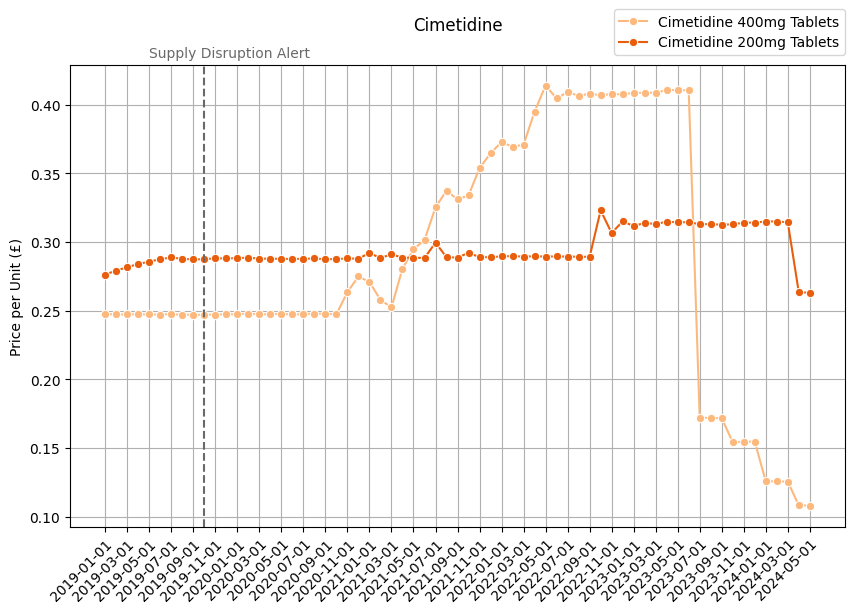

In [32]:
#Cimetidine

#filter for rows of top 3 codes 
#creates a boolean mask where only rows with that code are true. then filters for those rows.
cimetidine1 = gi_df[gi_df['bnf_code'] == '0103010D0AAABAB']
cimetidine2 = gi_df[gi_df['bnf_code'] == '0103010D0AAAAAA']

#Apply price_per_quantity
cimetidine1_grouped = price_per_quantity(cimetidine1)
cimetidine2_grouped = price_per_quantity(cimetidine2)

plt.figure(figsize=(10, 6))  # Define Figure Size
sns.set_palette('Oranges', 2)
 
# Plot the monthly prices of top 3 formulations of cimetidine
sns.lineplot(data=cimetidine1_grouped, x='month', y='price_per_quantity', marker='o', label= 'Cimetidine 400mg Tablets')
 
sns.lineplot(data=cimetidine2_grouped, x='month', y='price_per_quantity', marker='o', label='Cimetidine 200mg Tablets')

# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=cimetidine1_grouped['month'][::2], rotation=45, rotation_mode='anchor', horizontalalignment='right')
 
# Add titles and labels
plt.title('Cimetidine', pad=25)
plt.xlabel(None)
plt.ylabel('Price per Unit (£)')

#add vertical line for date of shortage and annotate it.
plt.axvline(x = '2019-10-01', ymin = 0, ymax = 1, color='dimgrey', linestyle='--')

plt.annotate('Supply Disruption Alert', color='dimgrey',
             xy=('2019-10-01', max(cimetidine1_grouped['price_per_quantity'])),
             xytext=('2019-05-01', max(cimetidine1_grouped['price_per_quantity']) * 1.05))
 
# Add a legend to differentiate the lines
plt.legend()
 
# Adding grid for better readability
plt.grid(True)

#Move legend box outside 
plt.legend(bbox_to_anchor=(1, 1.12), loc='upper right', borderaxespad=0)

# Display the plot
plt.show()

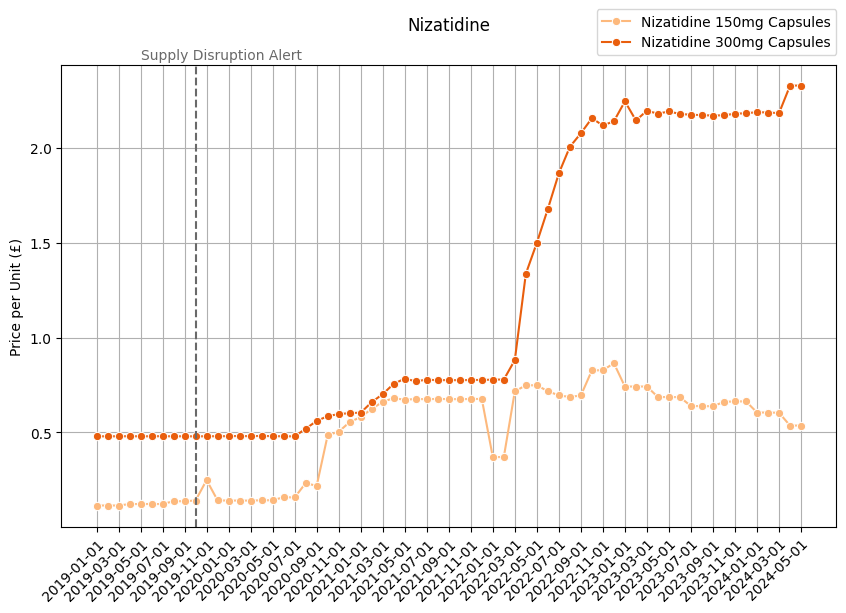

In [33]:
#Nizatidine

#filter for rows of top 3 codes 
nizatidine1 = gi_df[gi_df['bnf_code'] == '0103010N0AAAAAA']
nizatidine2 = gi_df[gi_df['bnf_code'] == '0103010N0AAABAB']

#Apply price_per_quantity
nizatidine1_grouped = price_per_quantity(nizatidine1)
nizatidine2_grouped = price_per_quantity(nizatidine2)

plt.figure(figsize=(10, 6))  # Define Figure Size
sns.set_palette('Oranges', 2)
    
# Plot the monthly prices of top 3 formulations of nizatidine
sns.lineplot(data=nizatidine1_grouped, x='month', y='price_per_quantity', marker='o', label= 'Nizatidine 150mg Capsules')
 
sns.lineplot(data=nizatidine2_grouped, x='month', y='price_per_quantity', marker='o', label='Nizatidine 300mg Capsules')

# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=nizatidine1_grouped['month'][::2], rotation=45, rotation_mode='anchor', horizontalalignment='right')
 
# Add titles and labels
plt.title('Nizatidine', pad=25)
plt.xlabel(None)
plt.ylabel('Price per Unit (£)')

#add vertical line for date of shortage and annotate it.
plt.axvline(x = '2019-10-01', ymin = 0, ymax = 1, color='dimgrey', linestyle='--')

plt.annotate('Supply Disruption Alert', color='dimgrey',
             xy=('2019-10-01', max(nizatidine2_grouped['price_per_quantity'])),
             xytext=('2019-05-01', max(nizatidine2_grouped['price_per_quantity']) * 1.06))
 
# Add a legend to differentiate the lines
plt.legend()
 
# Adding grid for better readability
plt.grid(True)

#Move legend box outside 
plt.legend(bbox_to_anchor=(1, 1.12), loc='upper right', borderaxespad=0)
 
# Display the plot
plt.show()

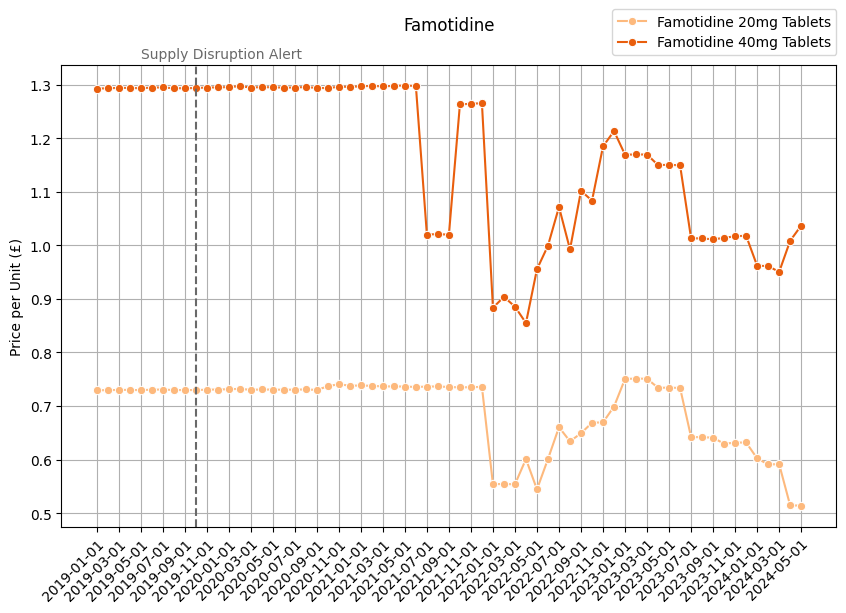

In [34]:
#Famotidine

#filter for rows of top 3 codes 
famotidine1 = gi_df[gi_df['bnf_code'] == '0103010H0AAAAAA']
famotidine2 = gi_df[gi_df['bnf_code'] == '0103010H0AAABAB']

#Apply price_per_quantity
famotidine1_grouped = price_per_quantity(famotidine1)
famotidine2_grouped = price_per_quantity(famotidine2)

plt.figure(figsize=(10, 6))  # Define Figure Size
sns.set_palette('Oranges', 2)
 
# Plot the monthly prices of top 3 formulations of cimetidine
sns.lineplot(data=famotidine1_grouped, x='month', y='price_per_quantity', marker='o', label= 'Famotidine 20mg Tablets')
 
sns.lineplot(data=famotidine2_grouped, x='month', y='price_per_quantity', marker='o', label='Famotidine 40mg Tablets')

# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)
 
# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=famotidine1_grouped['month'][::2], rotation=45, rotation_mode='anchor', horizontalalignment='right')
 
# Add titles and labels
plt.title('Famotidine', pad=25)
plt.xlabel(None)
plt.ylabel('Price per Unit (£)')

#add vertical line for date of shortage and annotate it.
plt.axvline(x = '2019-10-01', ymin = 0, ymax = 1, color='dimgrey', linestyle='--')

plt.annotate('Supply Disruption Alert', color='dimgrey',
             xy=('2019-10-01', max(famotidine2_grouped['price_per_quantity'])),
             xytext=('2019-05-01', max(famotidine2_grouped['price_per_quantity']) * 1.04))
 
# Add a legend to differentiate the lines
plt.legend()

#Move legend box outside 
plt.legend(bbox_to_anchor=(1, 1.12), loc='upper right', borderaxespad=0)
 
# Adding grid for better readability
plt.grid(True)
 
# Display the plot
plt.show()

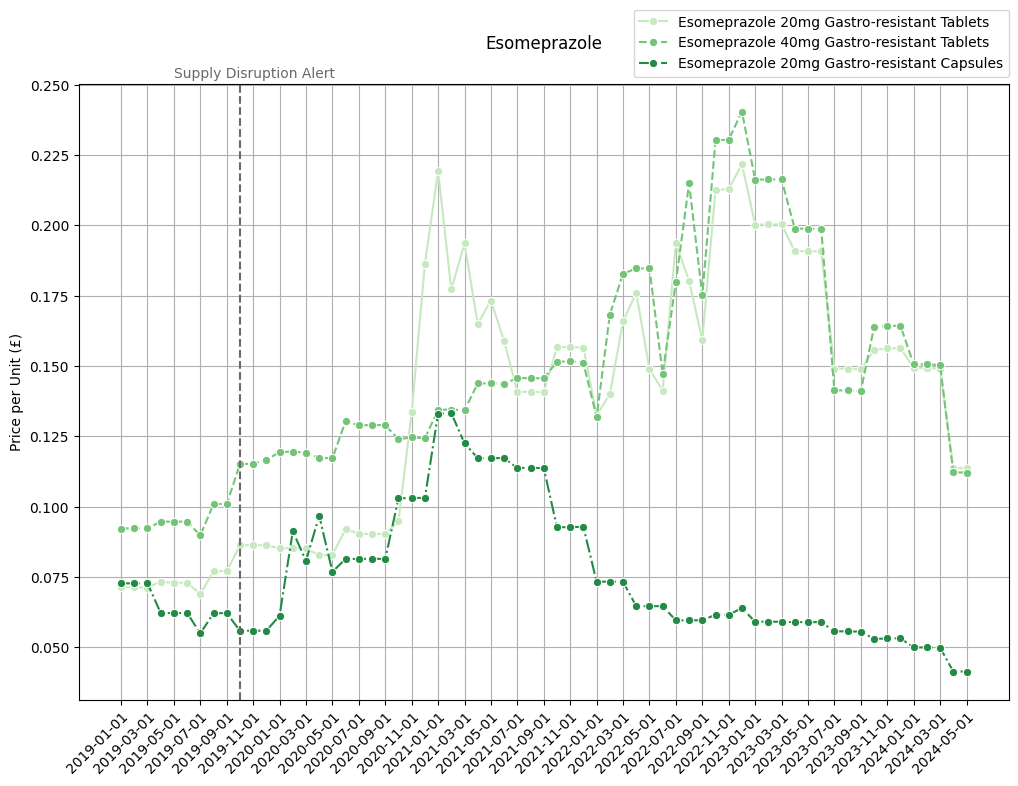

In [35]:
#Esomeprazole

#filter for rows of top 3 codes 
esomeprazole1 = gi_df[gi_df['bnf_code'] == '0103050E0AAAAAA'] #Esomeprazole 20mg gastro-resistant tablets
esomeprazole2 = gi_df[gi_df['bnf_code'] == '0103050E0AAABAB'] #Esomeprazole 40mg gastro-resistant tablets
esomeprazole3 = gi_df[gi_df['bnf_code'] == '0103050E0AAAFAF'] #Esomeprazole 20mg gastro-resistant capsules

#Apply price_per_quantity
esomeprazole1_grouped = price_per_quantity(esomeprazole1)
esomeprazole2_grouped = price_per_quantity(esomeprazole2)
esomeprazole3_grouped = price_per_quantity(esomeprazole3)

plt.figure(figsize=(12, 8))  # Define Figure Size
sns.set_palette('Greens', 3)
 
# Plot the monthly prices of top 3 formulations of cimetidine
sns.lineplot(data=esomeprazole1_grouped, x='month', y='price_per_quantity', marker='o', label= 'Esomeprazole 20mg Gastro-resistant Tablets')
 
sns.lineplot(data=esomeprazole2_grouped, x='month', y='price_per_quantity', marker='o', linestyle='--', label='Esomeprazole 40mg Gastro-resistant Tablets')

sns.lineplot(data=esomeprazole3_grouped, x='month', y='price_per_quantity', marker='o', linestyle='-.', label='Esomeprazole 20mg Gastro-resistant Capsules')
 
 
# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=esomeprazole1_grouped['month'][::2], rotation=45, rotation_mode='anchor', horizontalalignment='right')
 
# Add titles and labels
plt.title('Esomeprazole', pad=25)
plt.xlabel(None)
plt.ylabel('Price per Unit (£)')

#add vertical line for date of shortage and annotate it.
plt.axvline(x = '2019-10-01', ymin = 0, ymax = 1, color='dimgrey', linestyle='--')

plt.annotate('Supply Disruption Alert', color='dimgrey',
             xy=('2019-10-01', max(esomeprazole2_grouped['price_per_quantity'])),
             xytext=('2019-05-01', max(esomeprazole2_grouped['price_per_quantity']) * 1.05))
 
# Add a legend to differentiate the lines
plt.legend()

#Move legend box outside 
plt.legend(bbox_to_anchor=(1, 1.12), loc='upper right', borderaxespad=0)
 
# Adding grid for better readability
plt.grid(True)
 
# Display the plot
plt.show()

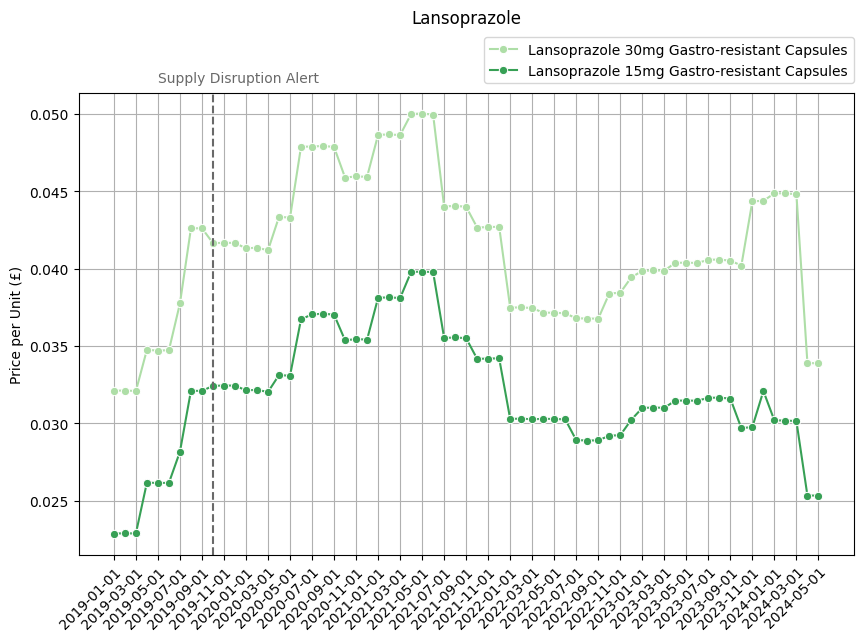

In [36]:
#Lansoprazole

#filter for rows of top 3 codes 
lansoprazole1 = gi_df[gi_df['bnf_code'] == '0103050L0AAAAAA'] #Lansoprazole 30mg gastro-resistant capsules
lansoprazole2 = gi_df[gi_df['bnf_code'] == '0103050L0AAABAB'] #	Lansoprazole 15mg gastro-resistant capsules

#Apply price_per_quantity
lansoprazole1_grouped = price_per_quantity(lansoprazole1)
lansoprazole2_grouped = price_per_quantity(lansoprazole2)

plt.figure(figsize=(10, 6))  # Define Figure Size
sns.set_palette('Greens', 2)
 
# Plot the monthly prices of top 3 formulations of cimetidine
sns.lineplot(data=lansoprazole1_grouped, x='month', y='price_per_quantity', marker='o', label= 'Lansoprazole 30mg Gastro-resistant Capsules')
 
sns.lineplot(data=lansoprazole2_grouped, x='month', y='price_per_quantity', marker='o', label='Lansoprazole 15mg Gastro-resistant Capsules')
 
# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)
 
# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=lansoprazole1_grouped['month'][::2], rotation=45, rotation_mode='anchor', horizontalalignment='right')
 
# Add titles and labels
plt.title('Lansoprazole', pad=50)
plt.xlabel(None)
plt.ylabel('Price per Unit (£)')

#add vertical line for date of shortage and annotate it.
plt.axvline(x = '2019-10-01', ymin = 0, ymax = 1, color='dimgrey', linestyle='--')

plt.annotate('Supply Disruption Alert', color='dimgrey',
             xy=('2019-10-01', max(lansoprazole1_grouped['price_per_quantity'])),
             xytext=('2019-05-01', max(lansoprazole1_grouped['price_per_quantity']) * 1.04))
 
# Add a legend to differentiate the lines
plt.legend()

#Move legend box outside 
plt.legend(bbox_to_anchor=(1, 1.12), loc='upper right', borderaxespad=0)

# Adding grid for better readability
plt.grid(True)
 
# Display the plot
plt.show()

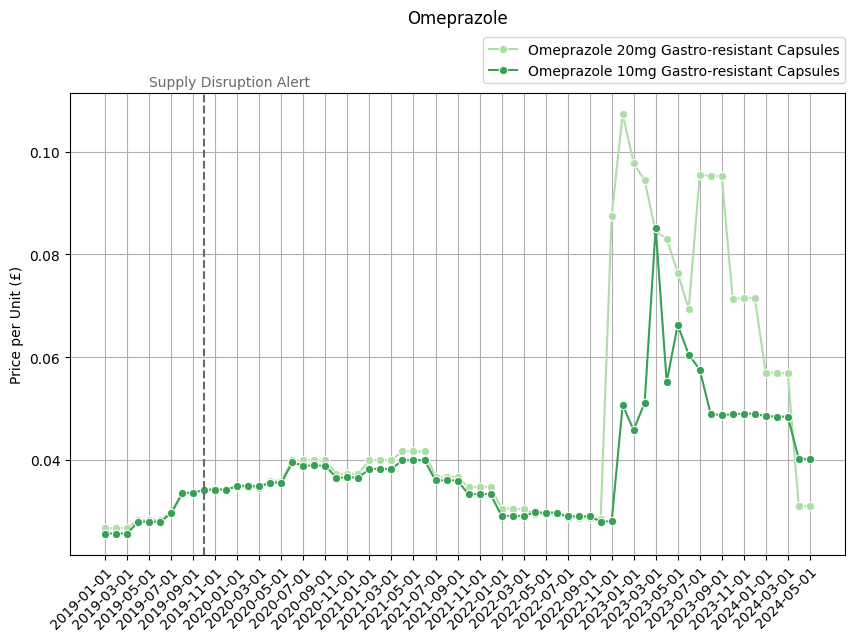

In [37]:
#Omeprazole

#filter for rows of top 3 codes 
omeprazole1 = gi_df[gi_df['bnf_code'] == '0103050P0AAAAAA'] #Omeprazole 20mg gastro-resistant capsules
omeprazole2 = gi_df[gi_df['bnf_code'] == '0103050P0AAAFAF'] #Omeprazole 10mg gastro-resistant capsules

#Apply price_per_quantity
omeprazole1_grouped = price_per_quantity(omeprazole1)
omeprazole2_grouped = price_per_quantity(omeprazole2)

plt.figure(figsize=(10, 6))  # Define Figure Size
sns.set_palette('Greens', 2)
 
# Plot the monthly prices of top 3 formulations of cimetidine
sns.lineplot(data=omeprazole1_grouped, x='month', y='price_per_quantity', marker='o', label= 'Omeprazole 20mg Gastro-resistant Capsules')
 
sns.lineplot(data=omeprazole2_grouped, x='month', y='price_per_quantity', marker='o', label='Omeprazole 10mg Gastro-resistant Capsules')

# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)
 
# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=omeprazole1_grouped['month'][::2], rotation=45, rotation_mode='anchor', horizontalalignment='right')
 
# Add titles and labels
plt.title('Omeprazole', pad=50)
plt.xlabel(None)
plt.ylabel('Price per Unit (£)')

#add vertical line for date of shortage and annotate it.
plt.axvline(x = '2019-10-01', ymin = 0, ymax = 1, color='dimgrey', linestyle='--')

plt.annotate('Supply Disruption Alert', color='dimgrey',
             xy=('2019-10-01', max(omeprazole1_grouped['price_per_quantity'])),
             xytext=('2019-05-01', max(omeprazole1_grouped['price_per_quantity']) * 1.05))
 
# Add a legend to differentiate the lines
plt.legend()

#Move legend box outside 
plt.legend(bbox_to_anchor=(1, 1.12), loc='upper right', borderaxespad=0)
 
# Adding grid for better readability
plt.grid(True)
 
# Display the plot
plt.show()

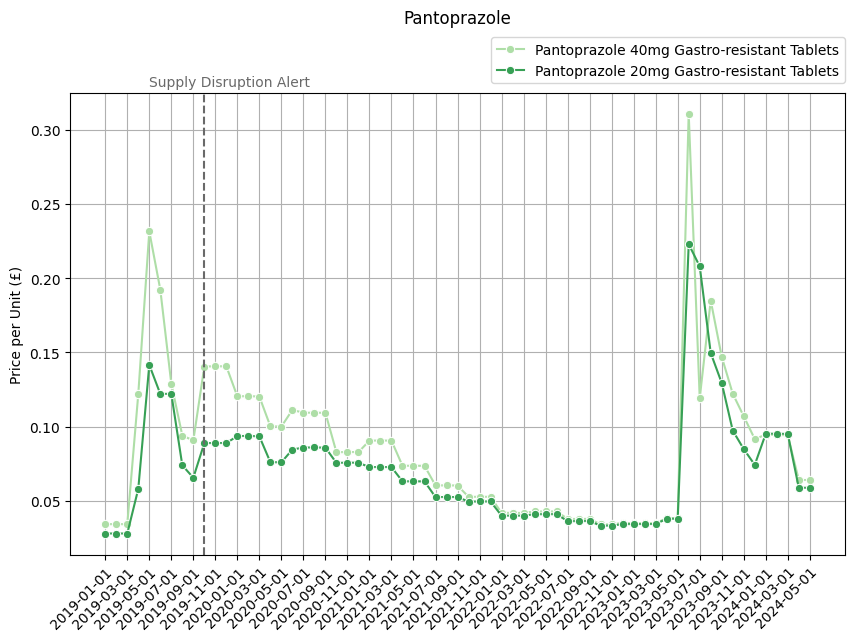

In [38]:
#Pantoprazole

#filter for rows of top 3 codes 
pantoprazole1 = gi_df[gi_df['bnf_code'] == '0103050R0AAAAAA']
pantoprazole2 = gi_df[gi_df['bnf_code'] == '0103050R0AAABAB']

#Apply price_per_quantity
pantoprazole1_grouped = price_per_quantity(pantoprazole1)
pantoprazole2_grouped = price_per_quantity(pantoprazole2)

plt.figure(figsize=(10, 6))  # Define Figure Size
sns.set_palette('Greens', 2)
 
# Plot the monthly prices of top 3 formulations of cimetidine
sns.lineplot(data=pantoprazole1_grouped, x='month', y='price_per_quantity', marker='o', label= 'Pantoprazole 40mg Gastro-resistant Tablets')
 
sns.lineplot(data=pantoprazole2_grouped, x='month', y='price_per_quantity', marker='o', label='Pantoprazole 20mg Gastro-resistant Tablets')
 
# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)
 
# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=pantoprazole1_grouped['month'][::2], rotation=45, rotation_mode='anchor', horizontalalignment='right')
 
# Add titles and labels
plt.title('Pantoprazole', pad=50)
plt.xlabel(None)
plt.ylabel('Price per Unit (£)')

#add vertical line for date of shortage and annotate it.
plt.axvline(x = '2019-10-01', ymin = 0, ymax = 1, color='dimgrey', linestyle='--')

plt.annotate('Supply Disruption Alert', color='dimgrey',
             xy=('2019-10-01', max(pantoprazole1_grouped['price_per_quantity'])),
             xytext=('2019-05-01', max(pantoprazole1_grouped['price_per_quantity']) * 1.06))
 
# Add a legend to differentiate the lines
plt.legend()

#Move legend box outside 
plt.legend(bbox_to_anchor=(1, 1.12), loc='upper right', borderaxespad=0)
 
# Adding grid for better readability
plt.grid(True)
 
# Display the plot
plt.show()

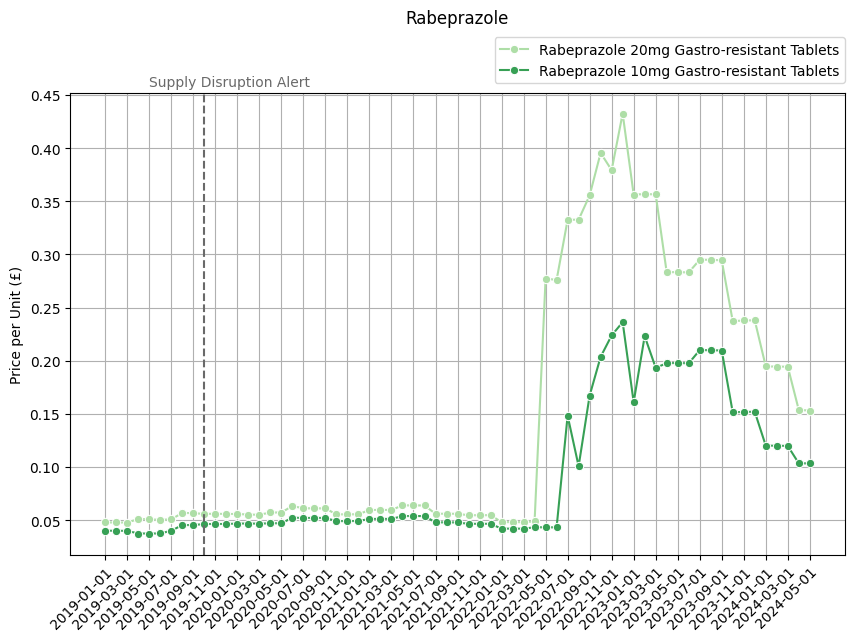

In [39]:
#Create Seaborn Figure for 3 Most Common Formulations of Rabeprazole

#filter for rows of top 3 codes 
rabeprazole1 = gi_df[gi_df['bnf_code'] == '0103050T0AAABAB']
rabeprazole2 = gi_df[gi_df['bnf_code'] == '0103050T0AAAAAA']

#Apply price_per_quantity
rabeprazole1_grouped = price_per_quantity(rabeprazole1)
rabeprazole2_grouped = price_per_quantity(rabeprazole2)

plt.figure(figsize=(10, 6))  # Define Figure Size
sns.set_palette('Greens', 2)
 
# Plot the monthly prices of top 3 formulations of cimetidine
sns.lineplot(data=rabeprazole1_grouped, x='month', y='price_per_quantity', marker='o', label= 'Rabeprazole 20mg Gastro-resistant Tablets')
 
sns.lineplot(data=rabeprazole2_grouped, x='month', y='price_per_quantity', marker='o', label='Rabeprazole 10mg Gastro-resistant Tablets')
 
# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)
 
# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=rabeprazole1_grouped['month'][::2], rotation=45, rotation_mode='anchor', horizontalalignment='right')
 
# Add titles and labels
plt.title('Rabeprazole', pad=50)
plt.xlabel(None)
plt.ylabel('Price per Unit (£)')

#add vertical line for date of shortage and annotate it.
plt.axvline(x = '2019-10-01', ymin = 0, ymax = 1, color='dimgrey', linestyle='--')

plt.annotate('Supply Disruption Alert', color='dimgrey',
             xy=('2019-10-01', max(rabeprazole1_grouped['price_per_quantity'])),
             xytext=('2019-05-01', max(rabeprazole1_grouped['price_per_quantity']) * 1.06))
 
# Add a legend to differentiate the lines
plt.legend()

# Move legend box outside 
plt.legend(bbox_to_anchor=(1, 1.12), loc='upper right', borderaxespad=0)
 
# Adding grid for better readability
plt.grid(True)
 
# Display the plot
plt.show()

#### Choropleths

In [15]:
import geopandas as gpd

In [16]:
# Creating gi_df_ccg dataset to contain CCG-level data.
gi_df_ccg = gi_df
gi_df_ccg.rename(columns = {'pct':'ccg_id'}, inplace = True)

gi_df_ccg.head()

,month,ccg_id,practice,bnf_name,bnf_code,items,quantity,net_cost,actual_cost
0,2023-04-01,36L,H83611,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,8,280.0,27.20,25.70305
1,2023-04-01,B2M3M,M86001,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,8,252.0,24.48,23.14266
2,2023-04-01,W2U3Z,E85696,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,9,140.0,13.60,12.91352
3,2023-04-01,99F,F81061,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,9,258.0,25.06,23.80102
4,2023-04-01,15E,M85164,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,9,364.0,35.36,33.39660


In [17]:
#Filter ranitidine and PPI data using the gi_df_ccg dataframe (since we are no longer using gi_df data)

data_filtered_ranitidine_ccg = bnf_code_filter(gi_df_ccg, 'bnf_code', ranitidine_code, ranitidine_exclude_codes)
data_filtered_PPI_ccg = bnf_code_filter(gi_df_ccg, 'bnf_code', PPI_code, PPI_exclude_codes)


In [18]:
# Aggregate by CCG for July 2019 and July 2020

# Ranitidine
ranitidine_ccg_2019 = data_filtered_ranitidine_ccg[data_filtered_ranitidine_ccg['month'] == '2019-07-01'].groupby('ccg_id')['items'].sum().reset_index(name='ranitidine_2019')
ranitidine_ccg_2020 = data_filtered_ranitidine_ccg[data_filtered_ranitidine_ccg['month'] == '2020-07-01'].groupby('ccg_id')['items'].sum().reset_index(name='ranitidine_2020')

# PPIs
ppi_ccg_2019 = data_filtered_PPI_ccg[data_filtered_PPI_ccg['month'] == '2019-07-01'].groupby('ccg_id')['items'].sum().reset_index(name='ppi_2019')
ppi_ccg_2020 = data_filtered_PPI_ccg[data_filtered_PPI_ccg['month'] == '2020-07-01'].groupby('ccg_id')['items'].sum().reset_index(name='ppi_2020')

# Alternative H2RAs
data_filtered_H2RA_ccg = bnf_code_filter(gi_df_ccg, 'bnf_code', alternative_H2RA, alternative_H2RA_exclude_codes)
H2RA_ccg_2019 = data_filtered_H2RA_ccg[data_filtered_H2RA_ccg['month'] == '2019-07-01'].groupby('ccg_id')['items'].sum().reset_index(name='H2RA_2019')
H2RA_ccg_2020 = data_filtered_H2RA_ccg[data_filtered_H2RA_ccg['month'] == '2020-07-01'].groupby('ccg_id')['items'].sum().reset_index(name='H2RA_2020')

# for checking
print(H2RA_ccg_2020)
print(ranitidine_ccg_2020)


    ccg_id  ranitidine_2020
0      00L               61
1      00N              107
2      00P              176
3      00Q               81
4      00R               95
..     ...              ...
104  M2L0M               68
105    R1L                1
106    RNU                2
107  W2U3Z              965
108  X2C4Y              217

[109 rows x 2 columns]


In [19]:
# Growth relative to ranitidine baseline Calculations

# PPI

PPI_switch_rate_ccg = ppi_ccg_2019.merge(ppi_ccg_2020, on='ccg_id', how='left').merge(ranitidine_ccg_2019, on='ccg_id', how='left') #create switchrate dataframe
PPI_switch_rate_ccg['ppi_switch_rate'] = (PPI_switch_rate_ccg['ppi_2020'] - PPI_switch_rate_ccg['ppi_2019']) *100 / PPI_switch_rate_ccg['ranitidine_2019']
#Account for NaN and positive / negative infinity
PPI_switch_rate_ccg['ppi_switch_rate'] = PPI_switch_rate_ccg['ppi_switch_rate'].fillna(0)
PPI_switch_rate_ccg['ppi_switch_rate'] = PPI_switch_rate_ccg['ppi_switch_rate'].replace([float('inf'), -float('inf')], 0)

print (PPI_switch_rate_ccg)


# Alternative H2RAs

H2RA_switch_rate_ccg = H2RA_ccg_2019.merge(H2RA_ccg_2020, on='ccg_id', how='left').merge(ranitidine_ccg_2019, on='ccg_id', how='left') #create switchrate dataframe
H2RA_switch_rate_ccg['H2RA_switch_rate'] = (H2RA_switch_rate_ccg['H2RA_2020'] - H2RA_switch_rate_ccg['H2RA_2019']) / H2RA_switch_rate_ccg['ranitidine_2019']
#Account for NaN and positive / negative infinity
H2RA_switch_rate_ccg['H2RA_switch_rate'] = H2RA_switch_rate_ccg['H2RA_switch_rate'].fillna(0)
H2RA_switch_rate_ccg['H2RA_switch_rate'] = H2RA_switch_rate_ccg['H2RA_switch_rate'].replace([float('inf'), -float('inf')], 0)
H2RA_switch_rate_ccg = H2RA_switch_rate_ccg.set_index('ccg_id')

print (H2RA_switch_rate_ccg)


    ccg_id  ppi_2019  ppi_2020  ranitidine_2019  ppi_switch_rate
0      00L     44395   50809.0           3723.0       172.280419
1      00N     20880   24299.0           1954.0       174.974411
2      00P     47060   54007.0           3363.0       206.571514
3      00Q     18447   19719.0           1650.0        77.090909
4      00R     23447   27630.0           2268.0       184.435626
..     ...       ...       ...              ...              ...
210    RYW        10       4.0              1.0      -600.000000
211    RYX        11      42.0              5.0       620.000000
212    RYY         2       3.0              2.0        50.000000
213  W2U3Z    145205  157823.0          17005.0        74.201705
214  X2C4Y     41646   46703.0           4283.0       118.071445

[215 rows x 5 columns]


In [20]:
# Aggregate patient number data by CCG for July 2019

#make a df for july 2019 practice data
patient_number_july2019 = statistics_df.groupby('practice')['total_list_size'].sum().reset_index()
print(patient_number_july2019)

#merge to assign each practice to a CCG
patient_numbers_ccg = patient_number_july2019.merge(practices_df, left_on='practice', right_on='code', how='left')
print(patient_numbers_ccg)

#group by patient numbers by CCG 
patient_numbers_ccg = patient_numbers_ccg.groupby('ccg_id')['total_list_size'].sum().reset_index()
print(patient_numbers_ccg)


     practice  total_list_size
0      A81001           463241
1      A81002          2173772
2      A81003            80850
3      A81004          1175694
4      A81005           905676
...       ...              ...
9346   Y07275            75334
9347   Y07377             2206
9348   Y07697             1139
9349   Y07819              178
9350   Y08124               49

[9351 rows x 2 columns]
     practice  total_list_size    code                               name  \
0      A81001           463241  A81001                THE DENSHAM SURGERY   
1      A81002          2173772  A81002         QUEENS PARK MEDICAL CENTRE   
2      A81003            80850  A81003          VICTORIA MEDICAL PRACTICE   
3      A81004          1175694  A81004              ACKLAM MEDICAL CENTRE   
4      A81005           905676  A81005                 SPRINGWOOD SURGERY   
...       ...              ...     ...                                ...   
9346   Y07275            75334  Y07275         BROUGHTON HOUSE G

In [21]:
#merge patient numbers with ranitidine baseline 
ranitidine_baseline_per_patient = PPI_switch_rate_ccg.merge(patient_numbers_ccg, left_on='ccg_id', right_on='ccg_id', how='inner')
print(ranitidine_baseline_per_patient)

    ccg_id  ppi_2019  ppi_2020  ranitidine_2019  ppi_switch_rate  \
0      00L     44395   50809.0           3723.0       172.280419   
1      00N     20880   24299.0           1954.0       174.974411   
2      00P     47060   54007.0           3363.0       206.571514   
3      00Q     18447   19719.0           1650.0        77.090909   
4      00R     23447   27630.0           2268.0       184.435626   
..     ...       ...       ...              ...              ...   
146    RY5        48     120.0              4.0      1800.000000   
147    RY6         8       6.0              4.0       -50.000000   
148    RYG         7      13.0              5.0       120.000000   
149  W2U3Z    145205  157823.0          17005.0        74.201705   
150  X2C4Y     41646   46703.0           4283.0       118.071445   

     total_list_size  
0           37132264  
1           17819394  
2           32275210  
3           20051160  
4           19719408  
..               ...  
146                0  

In [22]:
# Obtaining gdf data

# If don't exist locally, get GeoJSON and codes for ICBs and SICBLs (April 2023)
sicbl_geojson_path = os.path.join("..","data","sicbl_geojson.geojson")
sicbl_codes_path = os.path.join("..","data","sicbl_codes.csv")
icb_geojson_path = os.path.join("..","data","icb_geojson.geojson")
icb_codes_path = os.path.join("..","data","icb_codes.csv")

# Check if files exist, and if not, download and save them
if not os.path.exists(sicbl_geojson_path):
    sicbl_gdf = gpd.read_file('https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/Sub_Integrated_Care_Board_Locations_April_2023_EN_BGC/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson').to_crs('epsg:27700')
    sicbl_gdf.to_file(sicbl_geojson_path, driver='GeoJSON')
else:
    sicbl_gdf = gpd.read_file(sicbl_geojson_path)

if not os.path.exists(sicbl_codes_path):
    sicbl_codes_df = pd.read_csv('https://open-geography-portalx-ons.hub.arcgis.com/api/download/v1/items/db9328469faa4fd9badfb532dfbcb32b/csv?layers=0')
    sicbl_codes_df.to_csv(sicbl_codes_path, index=False)
else:
    sicbl_codes_df = pd.read_csv(sicbl_codes_path)

if not os.path.exists(icb_geojson_path):
    icb_gdf = gpd.read_file('https://services1.arcgis.com/ESMARspQHYMw9BZ9/ArcGIS/rest/services/Integrated_Care_Boards_April_2023_EN_BGC/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson').to_crs('epsg:27700')
    icb_gdf.to_file(icb_geojson_path, driver='GeoJSON')
else:
    icb_gdf = gpd.read_file(icb_geojson_path)

if not os.path.exists(icb_codes_path):
    icb_codes_df = pd.read_csv('https://open-geography-portalx-ons.hub.arcgis.com/api/download/v1/items/6924fa126d7a428782eda4b374b6d734/csv?layers=0')
    icb_codes_df.to_csv(icb_codes_path, index=False)
else:
    icb_codes_df = pd.read_csv(icb_codes_path)

In [7]:
sicbl_gdf.head()

,FID,SICBL23CD,SICBL23NM,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length,GlobalID,geometry
0,1,E38000006,NHS South Yorkshire ICB - 02P,429979,403330,-1.549250,53.52580,3.290905e+08,123174.329795,8a7dd53d-9ae1-4b6a-a637-a9635e13b6d0,"POLYGON ((436695.380 413060.416, 436833.554 41..."
1,2,E38000007,NHS Mid and South Essex ICB - 99E,564014,194421,0.368068,51.62470,2.630960e+08,124621.273962,bd7fdae4-3299-406d-8878-eb3e4b128af3,"MULTIPOLYGON (((576455.946 184831.054, 576419...."
2,3,E38000008,NHS Nottingham and Nottinghamshire ICB - 02Q,468073,384833,-0.978700,53.35602,6.379281e+08,156982.515587,8f66b34d-3a17-42e3-83bb-d54eff0380eb,"MULTIPOLYGON (((482031.023 373913.662, 482015...."
3,4,E38000014,NHS Lancashire and South Cumbria ICB - 00Q,369490,422806,-2.463600,53.70080,1.370511e+08,63674.255512,f253dc00-46af-4024-8c01-47e930497862,"POLYGON ((369403.109 431710.186, 369499.116 43..."
4,5,E38000015,NHS Lancashire and South Cumbria ICB - 00R,332819,436634,-3.021990,53.82163,3.489997e+07,33917.243230,d8ecae8a-de94-411c-83aa-0a1f1647d0d6,"POLYGON ((333032.848 438380.778, 333037.180 43..."


In [23]:
#Retrieve only the ccg codes from the sicbl23nm column 

sicbl_gdf['ccg_code'] = sicbl_gdf['SICBL23NM'].str.split().str[-1]

sicbl_gdf.head()
print (sicbl_gdf)

     FID  SICBL23CD                                     SICBL23NM   BNG_E  \
0      1  E38000006                 NHS South Yorkshire ICB - 02P  429979   
1      2  E38000007             NHS Mid and South Essex ICB - 99E  564014   
2      3  E38000008  NHS Nottingham and Nottinghamshire ICB - 02Q  468073   
3      4  E38000014    NHS Lancashire and South Cumbria ICB - 00Q  369490   
4      5  E38000015    NHS Lancashire and South Cumbria ICB - 00R  332819   
..   ...        ...                                           ...     ...   
101  102  E38000261            NHS Derby and Derbyshire ICB - 15M  426752   
102  103  E38000262                NHS Northamptonshire ICB - 78H  477359   
103  104  E38000263              NHS Greater Manchester ICB - 01Y  394977   
104  105  E38000264               NHS Surrey Heartlands ICB - 92A  516917   
105  106  E38000265                          NHS Sussex ICB - 70F  508316   

      BNG_N      LONG       LAT   Shape__Area  Shape__Length  \
0    403330

#### Ranitidine Baseline Choropleth

In [26]:
# Merge ranitidine per patient data with map data
ranitidine_ccg_maps_gdf = ranitidine_baseline_per_patient.merge(sicbl_gdf, left_on='ccg_id', right_on='ccg_code', how='inner')

#calculate ranitidine per patient values 
ranitidine_ccg_maps_gdf['ranitidine_per_1000patient'] = ranitidine_ccg_maps_gdf['ranitidine_2019']*1000/ranitidine_ccg_maps_gdf['total_list_size']
ranitidine_ccg_maps_gdf.head()

,ccg_id,ppi_2019,ppi_2020,ranitidine_2019,ppi_switch_rate,total_list_size,FID,SICBL23CD,SICBL23NM,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length,GlobalID,geometry,ccg_code,ranitidine_per_1000patient
0,00L,44395,50809.0,3723.0,172.280419,37132264,36,E38000130,NHS North East and North Cumbria ICB - 00L,395322,600699,-2.07523,55.30037,5.032491e+09,585130.572707,492e0da5-dd98-4333-b250-e7746ba82391,"MULTIPOLYGON (((429469.103 604756.076, 429495....",00L,0.100263
1,00N,20880,24299.0,1954.0,174.974411,17819394,46,E38000163,NHS North East and North Cumbria ICB - 00N,435513,564060,-1.44681,54.96990,6.443107e+07,49006.974665,fe719a1e-b630-4aa4-968d-70a2d7da20f8,"POLYGON ((437555.981 567863.226, 437784.120 56...",00N,0.109656
2,00P,47060,54007.0,3363.0,206.571514,32275210,53,E38000176,NHS North East and North Cumbria ICB - 00P,436470,551524,-1.43344,54.85719,1.374219e+08,97386.941901,1299a4c0-3cc6-4d0f-a62a-67145f334f83,"MULTIPOLYGON (((441401.432 557945.830, 441230....",00P,0.104198
3,00Q,18447,19719.0,1650.0,77.090909,20051160,4,E38000014,NHS Lancashire and South Cumbria ICB - 00Q,369490,422806,-2.46360,53.70080,1.370511e+08,63674.255512,f253dc00-46af-4024-8c01-47e930497862,"POLYGON ((369403.109 431710.186, 369499.116 43...",00Q,0.082290
4,00R,23447,27630.0,2268.0,184.435626,19719408,5,E38000015,NHS Lancashire and South Cumbria ICB - 00R,332819,436634,-3.02199,53.82163,3.489997e+07,33917.243230,d8ecae8a-de94-411c-83aa-0a1f1647d0d6,"POLYGON ((333032.848 438380.778, 333037.180 43...",00R,0.115014


In [27]:
# To ensure geometry column is recognised in subsequent code
ranitidine_ccg_maps_gdf = gpd.GeoDataFrame(ranitidine_ccg_maps_gdf, geometry='geometry')

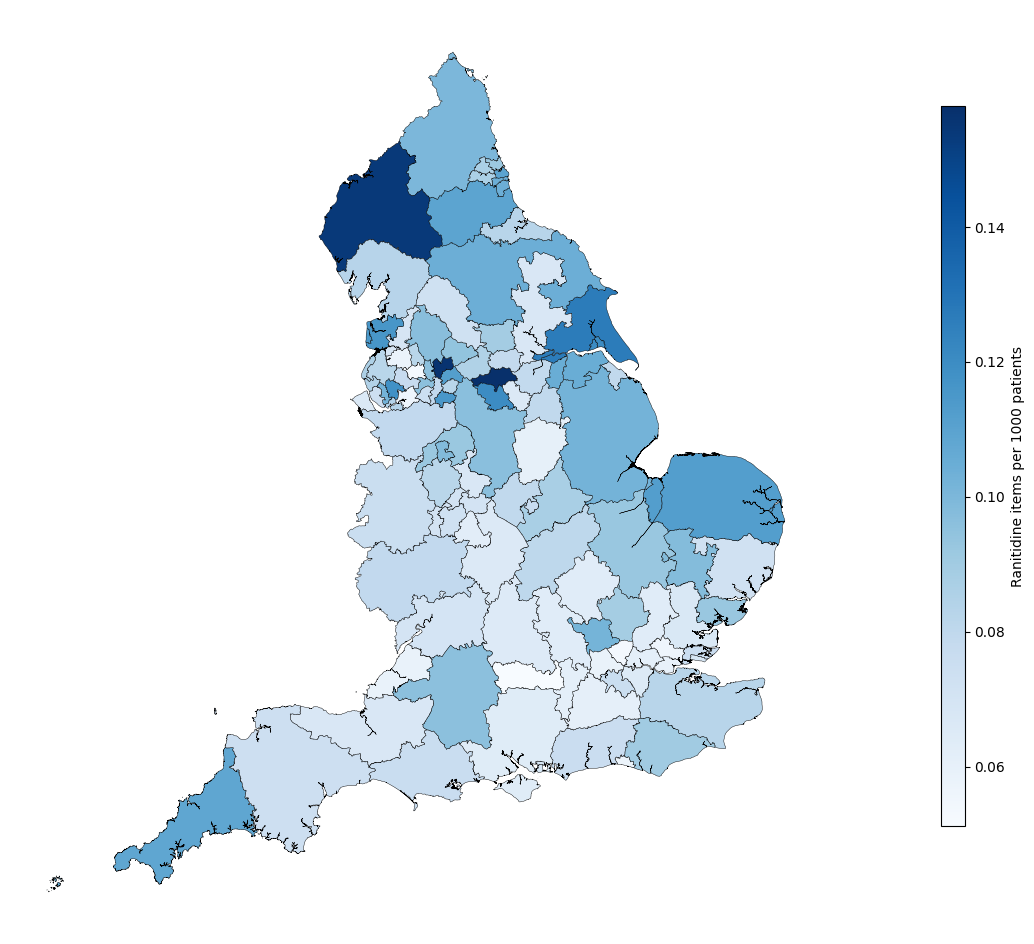

In [30]:
# Ranitidine Items per 1000 Patients at Baseline choropleth 

from matplotlib.ticker import FuncFormatter

#define attributes
colormap = 'Blues'
min_value = ranitidine_ccg_maps_gdf['ranitidine_per_1000patient'].min()
max_value = ranitidine_ccg_maps_gdf['ranitidine_per_1000patient'].max() 

# create plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the CCG choropleth
ranitidine_ccg_maps_gdf.plot(ax=ax, column='ranitidine_per_1000patient', legend=False, figsize=(12, 12), cmap=colormap, vmin=min_value, vmax=max_value, edgecolor='black', linewidth=0.3).set_axis_off()

# Define scientific notation formatter
def scientific_notation(x, pos):
    return f"{x:.2f}"  # Adjust '.1e' for precision if needed

# Add a colorbar and legend
cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])  # Adjust position as needed
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=min_value, vmax=max_value))  # You can specify the colormap here
colorbar = plt.colorbar(sm, cax=cax, label="Ranitidine items per 1000 patients")
colorbar.formatter = FuncFormatter(scientific_notation)  # Apply scientific notation formatter
colorbar.update_ticks()  # Update ticks with the new format


#show the plot and save it
plt.savefig(os.path.join("..","data","ranitidine_baseline.png"), dpi=300)
plt.show()

#### Overall Growth Choropleths

In [35]:
# Overall Growth Relative to Ranitidine Baseline Calculations

overall_switch_rate = PPI_switch_rate_ccg.merge(H2RA_switch_rate_ccg, left_on='ccg_id', right_on='ccg_id', how='inner').merge(ranitidine_ccg_2020, on='ccg_id', how='inner')
overall_switch_rate['overall_2019'] = overall_switch_rate['ppi_2019'] + overall_switch_rate['H2RA_2019'] + overall_switch_rate['ranitidine_2019_x']
overall_switch_rate['overall_2020'] = overall_switch_rate['ppi_2020'] + overall_switch_rate['H2RA_2020'] + overall_switch_rate['ranitidine_2020']

print (overall_switch_rate)
print (patient_numbers_ccg)

    ccg_id  ppi_2019  ppi_2020  ranitidine_2019_x  ppi_switch_rate  H2RA_2019  \
0      00L     44395   50809.0             3723.0       172.280419         55   
1      00N     20880   24299.0             1954.0       174.974411         25   
2      00P     47060   54007.0             3363.0       206.571514         67   
3      00Q     18447   19719.0             1650.0        77.090909         13   
4      00R     23447   27630.0             2268.0       184.435626         14   
..     ...       ...       ...                ...              ...        ...   
101  D9Y0V    127853  151925.0            11930.0       201.777033        127   
102  M1J4Y     67352   78861.0             7423.0       155.045130         43   
103  M2L0M     44056   50397.0             4315.0       146.952491         31   
104  W2U3Z    145205  157823.0            17005.0        74.201705         94   
105  X2C4Y     41646   46703.0             4283.0       118.071445         62   

     H2RA_2020  ranitidine_

In [72]:
#merge with patient data and calculate values per patient

overall_per_patient = overall_switch_rate.merge(patient_numbers_ccg, left_on='ccg_id', right_on='ccg_id', suffixes=('_left', '_right'), how='left')
overall_per_patient['2019_per_patient'] = overall_per_patient['overall_2019']/overall_per_patient['total_list_size']
overall_per_patient['2020_per_patient'] = overall_per_patient['overall_2020']/overall_per_patient['total_list_size']
overall_per_patient['percentage_change']=(overall_per_patient['2020_per_patient'] - overall_per_patient['2019_per_patient']) * 100/overall_per_patient['2019_per_patient']

print(overall_per_patient)

    ccg_id  ppi_2019  ppi_2020  ranitidine_2019_x  ppi_switch_rate  H2RA_2019  \
0      00L     44395   50809.0             3723.0       172.280419         55   
1      00N     20880   24299.0             1954.0       174.974411         25   
2      00P     47060   54007.0             3363.0       206.571514         67   
3      00Q     18447   19719.0             1650.0        77.090909         13   
4      00R     23447   27630.0             2268.0       184.435626         14   
..     ...       ...       ...                ...              ...        ...   
101  D9Y0V    127853  151925.0            11930.0       201.777033        127   
102  M1J4Y     67352   78861.0             7423.0       155.045130         43   
103  M2L0M     44056   50397.0             4315.0       146.952491         31   
104  W2U3Z    145205  157823.0            17005.0        74.201705         94   
105  X2C4Y     41646   46703.0             4283.0       118.071445         62   

     H2RA_2020  ranitidine_

In [73]:
#merge with map data

switchrate_maps_gdf = overall_per_patient.merge(sicbl_gdf, left_on='ccg_id', right_on='ccg_code', how='inner')
switchrate_maps_gdf = gpd.GeoDataFrame(switchrate_maps_gdf, geometry='geometry')

print (switchrate_maps_gdf)

    ccg_id  ppi_2019  ppi_2020  ranitidine_2019_x  ppi_switch_rate  H2RA_2019  \
0      00L     44395   50809.0             3723.0       172.280419         55   
1      00N     20880   24299.0             1954.0       174.974411         25   
2      00P     47060   54007.0             3363.0       206.571514         67   
3      00Q     18447   19719.0             1650.0        77.090909         13   
4      00R     23447   27630.0             2268.0       184.435626         14   
..     ...       ...       ...                ...              ...        ...   
101  D9Y0V    127853  151925.0            11930.0       201.777033        127   
102  M1J4Y     67352   78861.0             7423.0       155.045130         43   
103  M2L0M     44056   50397.0             4315.0       146.952491         31   
104  W2U3Z    145205  157823.0            17005.0        74.201705         94   
105  X2C4Y     41646   46703.0             4283.0       118.071445         62   

     H2RA_2020  ranitidine_

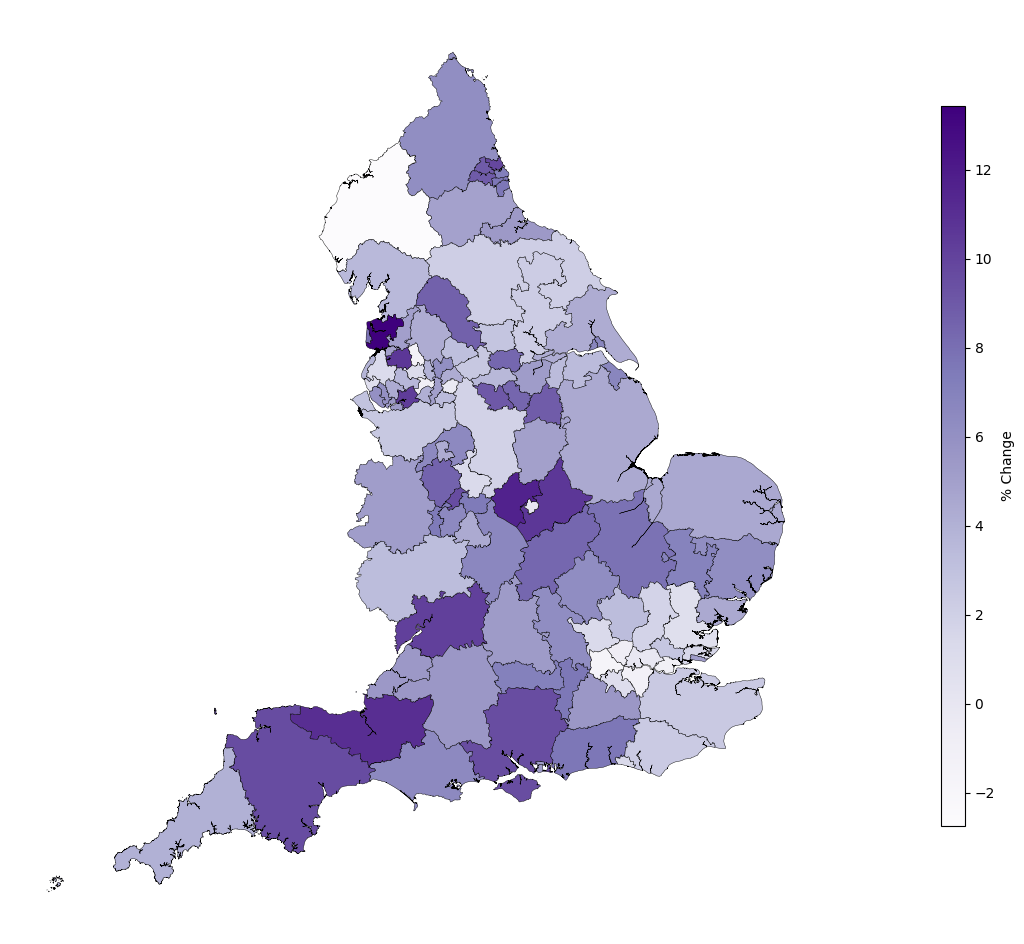

In [80]:
# overall percentage change choropleth

from matplotlib.ticker import FuncFormatter

#define attributes
colormap = 'Purples'
min_value = switchrate_maps_gdf['percentage_change'].min()
max_value = switchrate_maps_gdf['percentage_change'].max() # maximum value from whichever df has the larger value, to set shared colormap

# Create subplots
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the CCG choropleth
switchrate_maps_gdf.plot(ax=ax, column='percentage_change', legend=False, figsize=(12, 12), cmap=colormap, vmin=min_value, vmax=max_value, edgecolor='black', linewidth=0.3).set_axis_off()

# Add a colorbar and legend
cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])  # Adjust position as needed
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=min_value, vmax=max_value))  # You can specify the colormap here
colorbar = plt.colorbar(sm, cax=cax, label="% Change")


#show the plot and save it
plt.savefig(os.path.join("..","data","percentage_change.png"), dpi=300)
plt.show()

In [41]:
#saving intermediate dataframes as csv for easier reference

PPI_switch_rate_ccg.to_csv('PPI_switch_rate_ccg.csv', index=False)
sicbl_gdf.to_csv('sicbl_gdf.csv', index=False)
switchrate_ccg_maps_gdf.to_csv('switchrate_ccg_maps_gdf.csv', index=True)

#### Decile Charts

In [24]:
# Aggregate by practice for July 2019 and July 2020
ranitidine_2019 = data_filtered_ranitidine[data_filtered_ranitidine['month'] == '2019-07-01'].groupby('practice')['items'].sum().reset_index(name='ranitidine_2019')
ppi_2019 = data_filtered_PPI[data_filtered_PPI['month'] == '2019-07-01'].groupby('practice')['items'].sum().reset_index(name='ppi_2019')
ppi_2020 = data_filtered_PPI[data_filtered_PPI['month'] == '2020-07-01'].groupby('practice')['items'].sum().reset_index(name='ppi_2020')
print(ppi_2020)

     practice  ppi_2020
0      A81001       501
1      A81002      2448
2      A81004      1061
3      A81005      1318
4      A81006      2056
...       ...       ...
7467   Y06826         5
7468   Y06830         1
7469   Y06837         8
7470   Y06845        21
7471   Y06856         5

[7472 rows x 2 columns]


In [25]:
# Calculating PPI Switch Rate
PPI_switch_rate = ppi_2019.merge(ppi_2020, on='practice', how='left').merge(ranitidine_2019, on='practice', how='left') #create switchrate dataframe

PPI_switch_rate['ppi_switch_rate'] = (PPI_switch_rate['ppi_2020'] - PPI_switch_rate['ppi_2019']) / PPI_switch_rate['ranitidine_2019']

#Account for NaN and positive / negative infinity
PPI_switch_rate['ppi_switch_rate'] = PPI_switch_rate['ppi_switch_rate'].fillna(0)
PPI_switch_rate['ppi_switch_rate'] = PPI_switch_rate['ppi_switch_rate'].replace([float('inf'), -float('inf')], 0)

#fillna 0 for all of these cases. 


print (PPI_switch_rate)

     practice  ppi_2019  ppi_2020  ranitidine_2019  ppi_switch_rate
0      A81001       429     501.0             35.0         2.057143
1      A81002      2236    2448.0            172.0         1.232558
2      A81004       954    1061.0             51.0         2.098039
3      A81005      1148    1318.0             70.0         2.428571
4      A81006      1873    2056.0            142.0         1.288732
...       ...       ...       ...              ...              ...
7843   Y06450         3       3.0              NaN         0.000000
7844   Y06451         1       2.0              NaN         0.000000
7845   Y06492         5       1.0              NaN         0.000000
7846   Y06494         2       NaN              NaN         0.000000
7847   Y06502         1       NaN              NaN         0.000000

[7848 rows x 5 columns]


/tmp/ipykernel_16/270309928.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  PPI_decile_summary = PPI_switch_rate_cleaned.groupby('decile')['ppi_switch_rate'].mean()


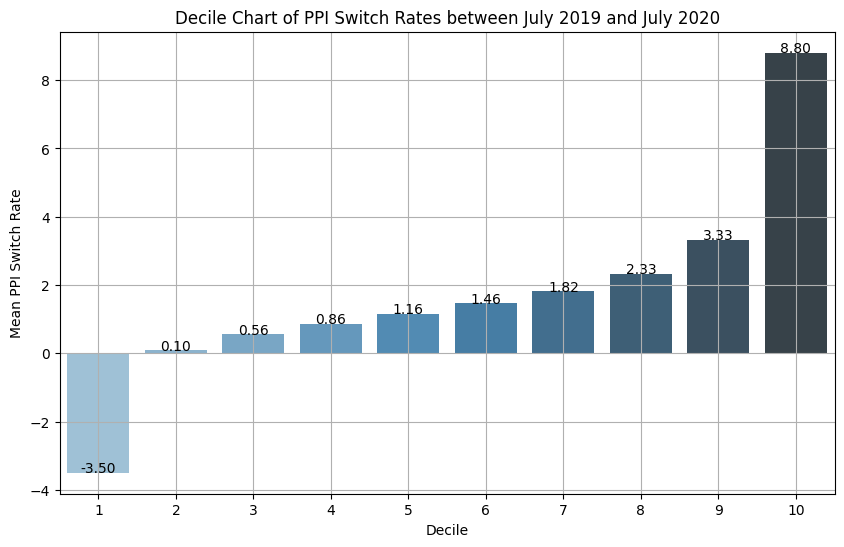

In [26]:
# Step 1: Clean the data by removing NaN values from the 'ppi_switch_rate' column. only rows that have values for both timepoints will remain.
PPI_switch_rate_cleaned = PPI_switch_rate.dropna().copy()

# Step 2: Calculate the deciles
PPI_switch_rate_cleaned.loc[:, 'decile'] = pd.qcut(PPI_switch_rate_cleaned['ppi_switch_rate'], 10, labels=range(1,11))
#.loc is to specifically select decile column and avoid errors.

# Step 3: Group by decile and calculate the mean ppi_switch_rate for each decile
PPI_decile_summary = PPI_switch_rate_cleaned.groupby('decile')['ppi_switch_rate'].mean()

# Step 4: Plot the decile chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=PPI_decile_summary.index, y=PPI_decile_summary.values, hue=PPI_decile_summary.index, palette="Blues_d", legend=False)

# Customize the chart
plt.title('Decile Chart of PPI Switch Rates between July 2019 and July 2020')
plt.xlabel('Decile')
plt.ylabel('Mean PPI Switch Rate')
plt.grid(True)

# Annotate the bars with mean switch rates
for i in range(len(PPI_decile_summary)):
    plt.text(i, PPI_decile_summary.values[i], f"{PPI_decile_summary.values[i]:.2f}", ha="center")

# Show the plot
plt.show()

In [94]:
print(PPI_switch_rate_cleaned)

     practice  ppi_2019  ppi_2020  ranitidine_2019  ppi_switch_rate decile
0      A81001       429     501.0             35.0         2.057143      8
1      A81002      2236    2448.0            172.0         1.232558      5
2      A81004       954    1061.0             51.0         2.098039      8
3      A81005      1148    1318.0             70.0         2.428571      8
4      A81006      1873    2056.0            142.0         1.288732      5
...       ...       ...       ...              ...              ...    ...
7833   Y06388        26      23.0              2.0        -1.500000      1
7834   Y06389        22     140.0              1.0       118.000000     10
7837   Y06407        46      18.0              5.0        -5.600000      1
7838   Y06409        56      40.0              3.0        -5.333333      1
7842   Y06443       968    1176.0             58.0         3.586207      9

[7001 rows x 6 columns]


In [27]:
#Doing the same for alternative H2RAs

#aggregating by practice for July 2019 and 2020
H2RA_2019 = data_filtered_alternative_H2RA[data_filtered_alternative_H2RA['month'] == '2019-07-01'].groupby('practice')['items'].sum().reset_index(name='H2RA_2019')
H2RA_2020 = data_filtered_alternative_H2RA[data_filtered_alternative_H2RA['month'] == '2020-07-01'].groupby('practice')['items'].sum().reset_index(name='H2RA_2020')

#Calculating H2RA switch rate 
H2RA_switch_rate = H2RA_2019.merge(H2RA_2020, on='practice', how='left').merge(ranitidine_2019, on='practice', how='left') #create switchrate dataframe

H2RA_switch_rate['H2RA_switch_rate'] = (H2RA_switch_rate['H2RA_2020'] - H2RA_switch_rate['H2RA_2019']) / H2RA_switch_rate['ranitidine_2019']

#Account for NaN and positive / negative infinity
H2RA_switch_rate['H2RA_switch_rate'] = H2RA_switch_rate['H2RA_switch_rate'].fillna(0)
H2RA_switch_rate['H2RA_switch_rate'] = H2RA_switch_rate['H2RA_switch_rate'].replace([float('inf'), -float('inf')], 0)

#fillna 0 for all of these cases. 

print (H2RA_switch_rate)

     practice  H2RA_2019  H2RA_2020  ranitidine_2019  H2RA_switch_rate
0      A81004          3        5.0             51.0          0.039216
1      A81006          1        4.0            142.0          0.021127
2      A81011          4        3.0             99.0         -0.010101
3      A81013          1       11.0             95.0          0.105263
4      A81014          2        NaN             54.0          0.000000
...       ...        ...        ...              ...               ...
2296   Y05733          2        3.0             70.0          0.014286
2297   Y05887          1        NaN              1.0          0.000000
2298   Y06007          1        3.0             54.0          0.037037
2299   Y06218          2        4.0             40.0          0.050000
2300   Y06356          2        1.0             53.0         -0.018868

[2301 rows x 5 columns]


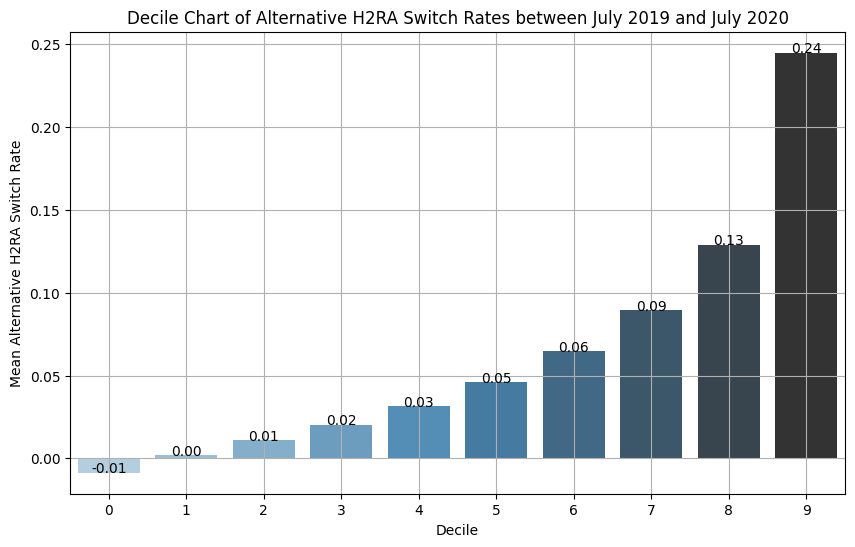

In [28]:
# Step 1: Clean the data by removing NaN values from the 'H2RA_switch_rate' column. only rows that have values for both timepoints will remain.
H2RA_switch_rate_cleaned = H2RA_switch_rate.dropna().copy()

# Step 2: Calculate the deciles
H2RA_switch_rate_cleaned.loc[:, 'decile'] = pd.qcut(H2RA_switch_rate_cleaned['H2RA_switch_rate'], 10, labels=False)
#.loc is to specifically select decile column and avoid errors.

# Step 3: Group by decile and calculate the mean ppi_switch_rate for each decile
H2RA_decile_summary = H2RA_switch_rate_cleaned.groupby('decile')['H2RA_switch_rate'].mean()

# Step 4: Plot the decile chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=H2RA_decile_summary.index, y=H2RA_decile_summary.values, hue=H2RA_decile_summary.index, palette="Blues_d", legend=False)

# Customize the chart
plt.title('Decile Chart of Alternative H2RA Switch Rates between July 2019 and July 2020')
plt.xlabel('Decile')
plt.ylabel('Mean Alternative H2RA Switch Rate')
plt.grid(True)

# Annotate the bars with mean switch rates
for i in range(len(H2RA_decile_summary)):
    plt.text(i, H2RA_decile_summary.values[i], f"{H2RA_decile_summary.values[i]:.2f}", ha="center")

# Show the plot
plt.show()

In [97]:
print(H2RA_switch_rate_cleaned)

     practice  H2RA_2019  H2RA_2020  ranitidine_2019  H2RA_switch_rate  decile
0      A81004          3        5.0             51.0          0.039216       5
1      A81006          1        4.0            142.0          0.021127       3
2      A81011          4        3.0             99.0         -0.010101       0
3      A81013          1       11.0             95.0          0.105263       7
5      A81017          1        1.0            149.0          0.000000       0
...       ...        ...        ...              ...               ...     ...
2295   Y05690          2       10.0             35.0          0.228571       9
2296   Y05733          2        3.0             70.0          0.014286       2
2298   Y06007          1        3.0             54.0          0.037037       4
2299   Y06218          2        4.0             40.0          0.050000       5
2300   Y06356          2        1.0             53.0         -0.018868       0

[1995 rows x 6 columns]


In [29]:
#Doing the same for overall switch rate 

overall_switch_rates = PPI_switch_rate.merge(H2RA_switch_rate, left_on='practice', right_on='practice', how='inner')
overall_switch_rates['overall_switch_rate'] = overall_switch_rates['ppi_switch_rate'] + overall_switch_rates['H2RA_switch_rate']

print(overall_switch_rates)

     practice  ppi_2019  ppi_2020  ranitidine_2019_x  ppi_switch_rate  \
0      A81004       954    1061.0               51.0         2.098039   
1      A81006      1873    2056.0              142.0         1.288732   
2      A81011      1317    1753.0               99.0         4.404040   
3      A81013       964    1252.0               95.0         3.031579   
4      A81014       430     402.0               54.0        -0.518519   
...       ...       ...       ...                ...              ...   
2294   Y05733       518     558.0               70.0         0.571429   
2295   Y05887         1       NaN                1.0         0.000000   
2296   Y06007       647     799.0               54.0         2.814815   
2297   Y06218       362     507.0               40.0         3.625000   
2298   Y06356       728    1045.0               53.0         5.981132   

      H2RA_2019  H2RA_2020  ranitidine_2019_y  H2RA_switch_rate  \
0             3        5.0               51.0          0

/tmp/ipykernel_16/2212363906.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  overall_decile_summary = overall_switch_rate_cleaned.groupby('decile')['overall_switch_rate'].mean()


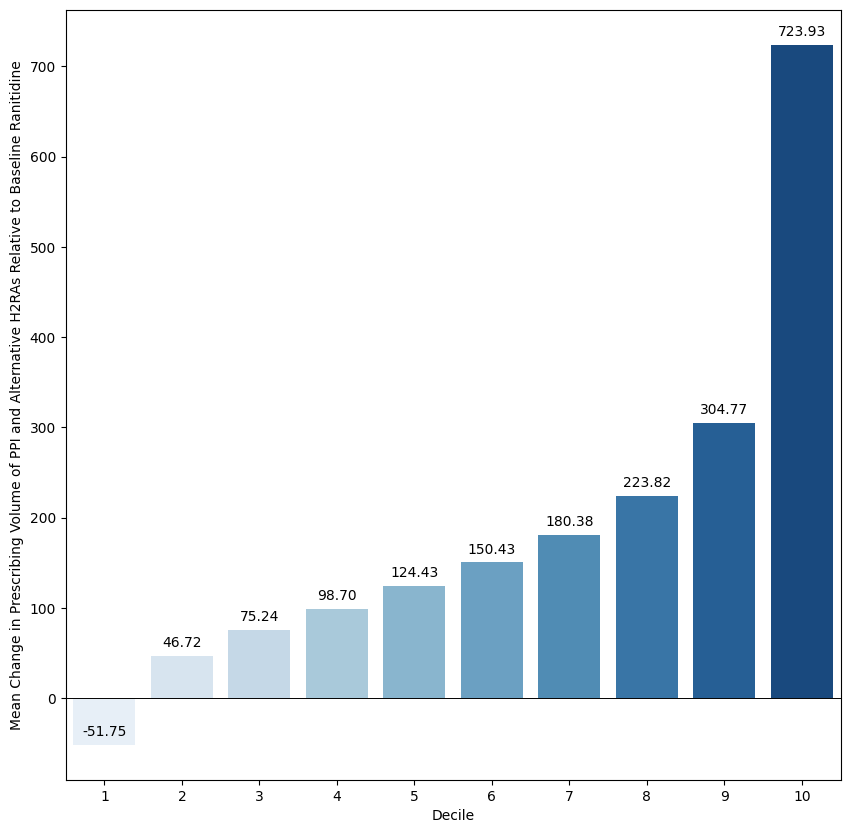

In [63]:
# Step 1: Clean the data by removing NaN values from the 'overall_switch_rate' column. only rows that have values for both timepoints will remain.
overall_switch_rate_cleaned = overall_switch_rates.dropna().copy()

overall_switch_rate_cleaned['overall_switch_rate']=overall_switch_rate_cleaned['overall_switch_rate']*100

# Step 2: Calculate the deciles
overall_switch_rate_cleaned.loc[:, 'decile'] = pd.qcut(overall_switch_rate_cleaned['overall_switch_rate'], 10, labels=range(1,11))
#.loc is to specifically select decile column and avoid errors.

# Step 3: Group by decile and calculate the mean ppi_switch_rate for each decile
overall_decile_summary = overall_switch_rate_cleaned.groupby('decile')['overall_switch_rate'].mean()

# Step 4: Plot the decile chart using seaborn
plt.figure(figsize=(10, 10))
sns.barplot(x=overall_decile_summary.index, y=overall_decile_summary.values, hue=overall_decile_summary.index, palette="Blues", legend=False)

# Customize the chart
plt.xlabel('Decile')
plt.ylabel('Mean Change in Prescribing Volume of PPI and Alternative H2RAs Relative to Baseline Ranitidine')
plt.grid(False)

# Annotate the bars with mean switch rates
for i in range(len(overall_decile_summary)):
    plt.text(i, overall_decile_summary.values[i] + 10, f"{overall_decile_summary.values[i]:.2f}", ha="center")

# Draw a horizontal line 
plt.axhline(y=0, xmin=0, xmax=1, color='black', lw=0.7, clip_on=False)

# Show the plot
plt.show()

In [50]:
print(overall_switch_rate_cleaned['overall_switch_rate'].median())

1.3818181818181818


In [55]:
tenth_decile = print(overall_switch_rate_cleaned['overall_switch_rate'].quantile(0.1))
ninetieth_decile = print(overall_switch_rate_cleaned['overall_switch_rate'].quantile(0.9))


0.26882474226804126
3.677547169811321
